In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_final = pd.read_csv('final_data.csv')
data_final.head(2)

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT)
0,0,1.0,0.370594,0.601457,0.998969,0.302646,-3.685025e-14,-0.173178,0.458143,1.266458,...,0.593831,-0.172398,0.671568,0.801932,0.126549,0.637555,1.655335,0.622879,0.026601,0.564050
1,1,1.0,0.464291,0.610235,0.998946,0.303556,3.466254e-15,-0.173178,0.461867,1.021944,...,0.593916,0.287330,0.671570,0.962361,0.120916,0.641100,1.446289,0.623652,0.026722,0.570175


In [ ]:
x = data_final.drop('Bankrupt?',axis =1)
y = data_final['Bankrupt?']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report

In [ ]:
def model(func,xtrain,ytrain,xtest,ytest,flag):
    mdl = func.fit(xtrain,ytrain)
    ypred_train = mdl.predict(xtrain)
    ypred_test = mdl.predict(xtest)
    if flag == 'X':
        return accuracy_score(ytrain,ypred_train),recall_score(ytrain,ypred_train),precision_score(ytrain,ypred_train),f1_score(ytrain,ypred_train)
    else:
        return accuracy_score(ytest,ypred_test),recall_score(ytest,ypred_test),precision_score(ytest,ypred_test),f1_score(ytest,ypred_test)
    

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
df_log_reg_scorecard = pd.DataFrame(columns=['model','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score(model,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_log_reg_scorecard
    df_log_reg_scorecard = df_log_reg_scorecard.append({'model':model,
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)

In [ ]:

train_acc,train_recall,train_preci,train_f1 = model(lr,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(lr,xtrain,ytrain,xtest,ytest,'')
update_test_score('Logistic without tuning',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_log_reg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Logistic without tuning,0.9746,0.972421,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#hyper parameter tuning
#parameters considered for log are
#solver,penalty,C,max_iter
#ref:https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69
lr = LogisticRegression()
parameter = [{'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty':['l2'],
              'C': [50,100,200],
              'max_iter':[5,10,30,50]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(lr,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
mdl = gs.fit(xtrain,ytrain)

In [ ]:
mdl.best_params_

{'C': 50, 'max_iter': 5, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
#{'C': 50, 'max_iter': 5, 'penalty': 'l2', 'solver': 'newton-cg'}
log_tuned_mdl_1 = LogisticRegression(penalty='l2',max_iter=5,C = 50,solver = 'newton-cg')
train_acc,train_recall,train_preci,train_f1 = model(log_tuned_mdl_1,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(log_tuned_mdl_1,xtrain,ytrain,xtest,ytest,'')
update_test_score("'Logistic with tuning model_1 with penalty='l2',max_iter=5,C = 50,solver = 'newton-cg'",train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_log_reg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Logistic without tuning,0.974600,0.972421,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,'Logistic with tuning model_1 with penalty='l2...,0.647252,0.651685,0.189655,0.203704,0.014295,0.016923,0.026586,0.03125


In [ ]:
parameter = [{'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty':['l2'],
              'C': [10,20,30,40,50],
              'max_iter':[1,2,3,4,5]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(lr,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
mdl_1 = gs.fit(xtrain,ytrain)

In [ ]:
mdl_1.best_params_

{'C': 20, 'max_iter': 1, 'penalty': 'l2', 'solver': 'sag'}

In [ ]:
#{'C': 20, 'max_iter': 1, 'penalty': 'l2', 'solver': 'sag'}
log_tuned_mdl_2 = LogisticRegression(penalty='l2',max_iter=1,C = 20,solver = 'sag')
train_acc,train_recall,train_preci,train_f1 = model(log_tuned_mdl_2,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(log_tuned_mdl_2,xtrain,ytrain,xtest,ytest,'')
update_test_score("'Logistic with tuning model_2 with penalty='l2',max_iter=1,C = 20,solver = 'sag'",train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_log_reg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Logistic without tuning,0.973725,0.974464,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,'Logistic with tuning model_1 with penalty='l2...,0.651631,0.663943,0.183333,0.14,0.014521,0.011254,0.026911,0.020833
2,'Logistic with tuning model_2 with penalty='l2...,0.629516,0.648621,0.216667,0.16,0.016010,0.012232,0.029817,0.022727


In [ ]:
parameter = [{'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
              'penalty':['none'],
              'C': [5,10,25,40,50],
              'max_iter':[2,5,7,10]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(lr,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
mdl_2 = gs.fit(xtrain,ytrain)

In [ ]:
mdl_2.best_params_

{'C': 50, 'max_iter': 2, 'penalty': 'none', 'solver': 'sag'}

In [ ]:
#{'C': 50, 'max_iter': 2, 'penalty': 'none', 'solver': 'sag'}
log_tuned_mdl_3 = LogisticRegression(penalty='none',max_iter=2,C = 50,solver = 'sag')
train_acc,train_recall,train_preci,train_f1 = model(log_tuned_mdl_3,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(log_tuned_mdl_3,xtrain,ytrain,xtest,ytest,'')
update_test_score("'Logistic with tuning model_3 with penalty='none',max_iter=2,C = 50,solver = 'sag'",train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_log_reg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Logistic without tuning,0.973725,0.974464,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,'Logistic with tuning model_1 with penalty='l2...,0.651631,0.663943,0.183333,0.14,0.014521,0.011254,0.026911,0.020833
2,'Logistic with tuning model_2 with penalty='l2...,0.629516,0.648621,0.216667,0.16,0.016010,0.012232,0.029817,0.022727
3,'Logistic with tuning model_3 with penalty='no...,0.652069,0.658325,0.166667,0.16,0.013254,0.012598,0.024555,0.023358


In [ ]:

parameter = [{'solver':[ 'liblinear', 'saga'],
              'penalty':['l1'],
              'C': [5,10,25,40,50],
              'max_iter':[2,5,7,10]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(lr,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
mdl_3 = gs.fit(xtrain,ytrain)

In [ ]:
mdl_3.best_params_

{'C': 5, 'max_iter': 2, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
#{'C': 5, 'max_iter': 2, 'penalty': 'l1', 'solver': 'saga'}
log_tuned_mdl_4 = LogisticRegression(penalty='l1',max_iter=2,C = 5,solver = 'saga')
train_acc,train_recall,train_preci,train_f1 = model(log_tuned_mdl_4,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(log_tuned_mdl_4,xtrain,ytrain,xtest,ytest,'')
update_test_score("'Logistic with tuning model_4 with penalty='l1',max_iter=2,C = 5,solver = 'saga'",train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_log_reg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Logistic without tuning,0.973725,0.974464,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,'Logistic with tuning model_1 with penalty='l2...,0.651631,0.663943,0.183333,0.14,0.014521,0.011254,0.026911,0.020833
2,'Logistic with tuning model_2 with penalty='l2...,0.629516,0.648621,0.216667,0.16,0.016010,0.012232,0.029817,0.022727
3,'Logistic with tuning model_3 with penalty='no...,0.652069,0.658325,0.166667,0.16,0.013254,0.012598,0.024555,0.023358
4,'Logistic with tuning model_4 with penalty='l1...,0.645719,0.663943,0.191667,0.14,0.014896,0.011254,0.027644,0.020833


In [ ]:
parameter = [{'solver':['saga'],
              'penalty':['elasticnet'],
              'C': [5,10,25,40,50],
              'max_iter':[2,5,7,10],
              'l1_ratio' : [0.1,0.2,0.6,0.8,0.9]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(lr,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
mdl_5 = gs.fit(xtrain,ytrain)

In [ ]:
mdl_5.best_params_

{'C': 5,
 'l1_ratio': 0.9,
 'max_iter': 2,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [ ]:
log_tuned_mdl_5 = LogisticRegression(penalty='elasticnet',max_iter=2,C = 5,solver = 'saga',l1_ratio = 0.9)
train_acc,train_recall,train_preci,train_f1 = model(log_tuned_mdl_5,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(log_tuned_mdl_5,xtrain,ytrain,xtest,ytest,'')
update_test_score("'Logistic with tuning model_5 with penalty='elasticnet',max_iter=2,C = 5,solver = 'saga',l1_ratio = 0.9",train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
#@title Default title text
df_log_reg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Logistic without tuning,0.974600,0.972421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,'Logistic with tuning model_1 with penalty='l2...,0.647252,0.651685,0.189655,0.203704,0.014295,0.016923,0.026586,0.031250
2,'Logistic with tuning model_2 with penalty='l2...,0.636961,0.649132,0.224138,0.185185,0.016311,0.015314,0.030409,0.028289
3,'Logistic with tuning model_3 with penalty='no...,0.644624,0.648110,0.198276,0.203704,0.014810,0.016743,0.027561,0.030942
4,'Logistic with tuning model_4 with penalty='l1...,0.647690,0.647600,0.189655,0.185185,0.014314,0.015244,0.026618,0.028169
5,'Logistic with tuning model_5 with penalty='el...,0.643092,0.645557,0.215517,0.185185,0.015985,0.015152,0.029762,0.028011


In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
print('avg train recall',cross_val_score(log_tuned_mdl_5,xtrain,ytrain,cv = 5,scoring = 'recall').mean())
print('avg test recall',cross_val_score(log_tuned_mdl_5,xtest,ytest,cv = 5,scoring = 'recall').mean())
print('avg train F1',cross_val_score(log_tuned_mdl_5,xtrain,ytrain,cv = 5,scoring = 'f1').mean())
print('avg test F1',cross_val_score(log_tuned_mdl_5,xtest,ytest,cv = 5,scoring = 'f1').mean())

avg train recall 0.213768115942029
avg test recall 0.18181818181818182
avg train F1 0.030562151485452254
avg test F1 0.027435306668723226


In [ ]:
from sklearn.metrics import roc_curve,confusion_matrix

In [ ]:
def pred_prob_model(func,xtrain,ytrain,xtest,ytest):
    mdl = func.fit(xtrain,ytrain)
    ypred_train = mdl.predict_proba(xtrain)
    ypred_test = mdl.predict_proba(xtest)
    return ypred_train,ypred_test

In [ ]:
models = [lr,log_tuned_mdl_1,log_tuned_mdl_2,log_tuned_mdl_3,log_tuned_mdl_4,log_tuned_mdl_5]

In [ ]:
df_log_reg_threshold = pd.DataFrame(columns=['model','Train threshold','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_thresh(model,train_thresh,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_log_reg_threshold
    df_log_reg_threshold = df_log_reg_threshold.append({'model':model,
                                                     'Train threshold':train_thresh,
                                                        
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)

In [ ]:
def Thresholdmodel(func,xtrain,ytrain,xtest,ytest,flag,threshold):
    mdl = func.fit(xtrain,ytrain)
    ypred_train_prob = mdl.predict_proba(xtrain)
    ypred_test_prob = mdl.predict_proba(xtest)

    if flag == 'X':
        ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
        return accuracy_score(ytrain,ypred_train),recall_score(ytrain,ypred_train),precision_score(ytrain,ypred_train),f1_score(ytrain,ypred_train)
    else:
        ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
        return accuracy_score(ytest,ypred_test),recall_score(ytest,ypred_test),precision_score(ytest,ypred_test),f1_score(ytest,ypred_test)
    

In [ ]:
for i in models:
  ypred_train,ypred_test = pred_prob_model(i,xtrain,ytrain,xtest,ytest)
  fpr, tpr, thresholds = roc_curve(ytrain, ypred_train[:,1])
  youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
  youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
  youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
  #print('for model ' + str(i) + ' best thresold values is:', youdens_table['Threshold'][0])
  train_acc,train_recall,train_preci,train_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'X',youdens_table['Threshold'][0])
  test_acc,test_recall,test_preci,test_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'',youdens_table['Threshold'][0])

  update_test_score_thresh(i,youdens_table['Threshold'][0],train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_log_reg_threshold

,model,Train threshold,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,LogisticRegression(),1.500000,0.974600,0.972421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"LogisticRegression(C=50, max_iter=5, solver='n...",0.000150,0.025400,0.028090,0.991379,1.000000,0.025192,0.027593,0.049135,0.053705
2,"LogisticRegression(C=20, max_iter=1, solver='s...",0.002841,0.031312,0.151175,0.982759,0.833333,0.025132,0.026502,0.049011,0.051370
3,"LogisticRegression(C=50, max_iter=2, penalty='...",0.000497,0.029998,0.033197,0.982759,0.888889,0.025099,0.024806,0.048948,0.048265
4,"LogisticRegression(C=5, max_iter=2, penalty='l...",0.000213,0.026275,0.027579,0.991379,1.000000,0.025214,0.027579,0.049177,0.053678
5,"LogisticRegression(C=5, l1_ratio=0.9, max_iter...",0.000146,0.025400,0.027579,1.000000,1.000000,0.025400,0.027579,0.049541,0.053678


In [ ]:
import numpy as np

In [ ]:
#for model log_tuned_mdl_5
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.000146):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.000146):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.000146):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.000146):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.000146):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.000146):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(log_tuned_mdl_5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(log_tuned_mdl_5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(log_tuned_mdl_5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(log_tuned_mdl_5, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(log_tuned_mdl_5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(log_tuned_mdl_5, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 1.0
avg test recal 1.0
avg train f1 0.05074897982527672
avg test f1 0.05022664482864377
avg train prec 0.026053639846743294
avg test prec 0.026053639846743294


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
#consider model1
#let us perform cross validation for these models to get the avg recall score
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.000204):
    ypred_train_prob = mdl.predict_proba(xtrain)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(ytrain,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.000334):
    ypred_test_prob = mdl.predict_proba(xtest)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(ytest,ypred_test)

train_recall_scores = []
test_recall_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(log_tuned_mdl_1, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(log_tuned_mdl_1, X_train_k, X_test_k, y_train_k, y_test_k)) 


In [ ]:
np.mean(train_recall_scores)

1.0

In [ ]:
np.mean(test_recall_scores)

1.0

In [ ]:
ypred_train = log_tuned_mdl_1.predict(xtrain)
print(confusion_matrix(ytrain,ypred_train))

[[2954 1493]
 [  98   22]]


In [ ]:
threshold = 0.000204
ypred_train_prob = log_tuned_mdl_1.predict_proba(xtrain)
ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
print(confusion_matrix(ytrain,ypred_train))
    

[[   2 4445]
 [   0  120]]


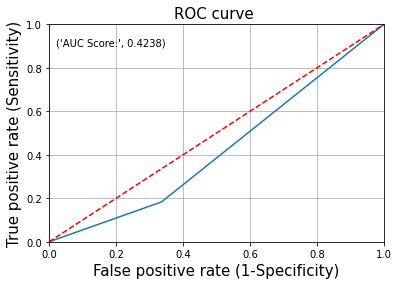

In [ ]:
ypred_train = log_tuned_mdl_1.predict(xtrain)
ypred_train_prob = log_tuned_mdl_1.predict_proba(xtrain)
ypred_train_pr = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
fpr,tpr,thresholds = roc_curve(ytrain,ypred_train)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytrain, ypred_train),4)))
                               
# plot the grid
plt.grid(True)

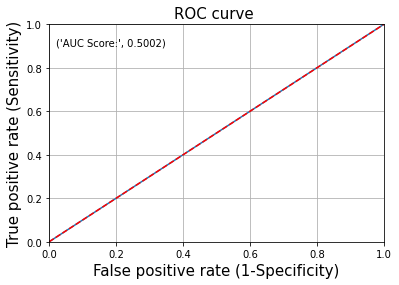

In [ ]:
ypred_train = log_tuned_mdl_1.predict(xtrain)
ypred_train_prob = log_tuned_mdl_1.predict_proba(xtrain)
ypred_train_pr = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
fpr,tpr,thresholds = roc_curve(ytrain,ypred_train_pr)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytrain, ypred_train_pr),4)))
                               
# plot the grid
plt.grid(True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
df_knn_scorecard = pd.DataFrame(columns=['model','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_knn(model,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_knn_scorecard
    df_knn_scorecard = df_knn_scorecard.append({'model':model,
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)

In [ ]:
train_acc,train_recall,train_preci,train_f1 = model(knn,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(lr,xtrain,ytrain,xtest,ytest,'')
update_test_score_knn('KNN without tuning',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_knn_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,KNN without tuning,0.975038,0.974464,0.091667,0.0,0.6875,0.0,0.161765,0.0


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xtrain,ytrain,cv=10,scoring = 'recall')
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

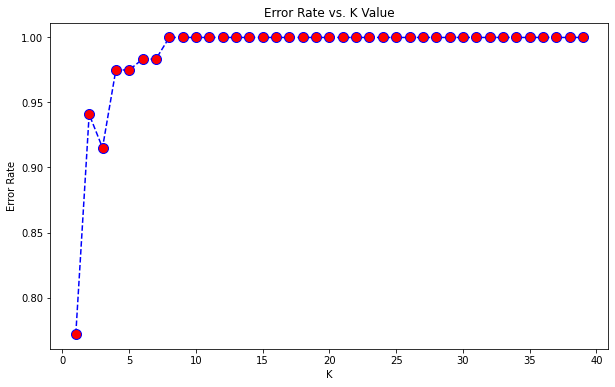

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Recal rate')

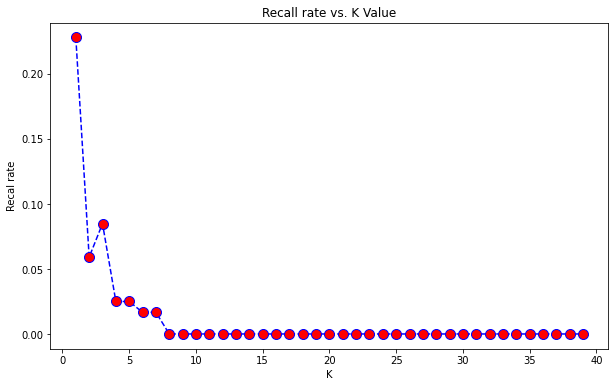

In [ ]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Recall rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Recal rate')

In [ ]:
#KNN with hyper paramter tuning
knn = KNeighborsClassifier()
parameter = [{'n_neighbors':[1,3,5,7,9,13,20],
              'weights':['uniform','distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[3,5,10,20,30,],
              'p':[1,2]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(knn,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
knn_mdl1 = gs.fit(xtrain,ytrain)

In [ ]:
knn_mdl1.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 3,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_mdl_1 = KNeighborsClassifier(n_neighbors= 1, leaf_size = 3, algorithm = 'ball_tree', p =2 ,weights = 'uniform')
train_acc,train_recall,train_preci,train_f1 = model(knn_mdl_1,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(knn_mdl_1,xtrain,ytrain,xtest,ytest,'')
update_test_score_knn("'KNN with tuning n_neighbors= 1, leaf_size = 3, algorithm = 'ball_tree', p =2 ,weights = 'uniform'",train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_knn_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,KNN without tuning,0.975038,0.974464,0.091667,0.00,0.6875,0.000000,0.161765,0.000000
1,"'KNN with tuning n_neighbors= 1, leaf_size = 3...",1.000000,0.958631,1.000000,0.18,1.0000,0.183673,1.000000,0.181818


In [ ]:
knn = KNeighborsClassifier()
parameter = [{'n_neighbors':[1,3,5],
              'weights':['uniform','distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[1,2,3],
              'p':[1,2]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(knn,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
knn_mdl2 = gs.fit(xtrain,ytrain)

In [ ]:
knn_mdl2.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_mdl_2 = KNeighborsClassifier(n_neighbors= 1, leaf_size = 1, algorithm = 'ball_tree', p =2 ,weights = 'uniform')
train_acc,train_recall,train_preci,train_f1 = model(knn_mdl_2,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(knn_mdl_2,xtrain,ytrain,xtest,ytest,'')
update_test_score_knn("'KNN with tuning n_neighbors= 1, leaf_size = 1, algorithm = 'ball_tree', p =2 ,weights = 'uniform'",train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_knn_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,KNN without tuning,0.977228,0.972421,0.137931,0.000000,0.8,0.000000,0.235294,0.000000
1,"'KNN with tuning n_neighbors= 1, leaf_size = 3...",1.000000,0.954545,1.000000,0.148148,1.0,0.156863,1.000000,0.152381
2,"'KNN with tuning n_neighbors= 1, leaf_size = 1...",1.000000,0.954545,1.000000,0.148148,1.0,0.156863,1.000000,0.152381


In [ ]:
print('avg train recall',cross_val_score(knn_mdl_2,xtrain,ytrain,cv = 5,scoring = 'recall').mean())
print('avg test recall',cross_val_score(knn_mdl_2,xtest,ytest,cv = 5,scoring = 'recall').mean())
print('avg train F1',cross_val_score(knn_mdl_2,xtrain,ytrain,cv = 5,scoring = 'f1').mean())
print('avg test F1',cross_val_score(knn_mdl_2,xtest,ytest,cv = 5,scoring = 'f1').mean())


avg train recall 0.19782608695652176
avg test recall 0.09090909090909091
avg train F1 0.20074801924775695
avg test F1 0.08428571428571427


In [ ]:
#threshold changing
df_knn_threshold = pd.DataFrame(columns=['model','Train threshold','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_knn_thresh(model,train_thresh,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_knn_threshold
    df_knn_threshold = df_knn_threshold.append({'model':model,
                                                     'Train threshold':train_thresh,
                                                    
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)

In [ ]:
models = [knn,knn_mdl_1,knn_mdl_2]

In [ ]:
for i in models:
  ypred_train,ypred_test = pred_prob_model(i,xtrain,ytrain,xtest,ytest)
  fpr, tpr, thresholds = roc_curve(ytrain, ypred_train[:,1])
  youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
  youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
  youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
  #print('for model ' + str(i) + ' best thresold values is:', youdens_table['Threshold'][0])
  train_acc,train_recall,train_preci,train_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'X',youdens_table['Threshold'][0])
  test_acc,test_recall,test_preci,test_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'',youdens_table['Threshold'][0])

  update_test_score_knn_thresh(i,youdens_table['Threshold'][0],train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_knn_threshold

,model,Train threshold,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,KNeighborsClassifier(),0.2,0.973287,0.957610,0.37069,0.12963,0.467391,0.162791,0.413462,0.14433
1,"KNeighborsClassifier(algorithm='ball_tree', le...",1.0,0.974600,0.972421,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
2,"KNeighborsClassifier(algorithm='ball_tree', le...",1.0,0.974600,0.972421,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000


In [ ]:
#for model knn model 1(without tuning)
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.2):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.2):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.2):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.2):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.2):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.2):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(knn, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(knn, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(knn, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(knn, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(knn, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(knn, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.2787216661490009
avg test recal 0.2404766085538693
avg train f1 0.32135979554712124
avg test f1 0.27100233100233095
avg train prec 0.381537001420179
avg test prec 0.32191966838193253


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree
df_Dec_scorecard = pd.DataFrame(columns=['model','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_decision(model,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_Dec_scorecard
    df_Dec_scorecard = df_Dec_scorecard.append({'model':model,
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)

In [ ]:
dc = DecisionTreeClassifier()
train_acc,train_recall,train_preci,train_f1 = model(dc,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(dc,xtrain,ytrain,xtest,ytest,'')
update_test_score_decision('Decision Tree without tuning',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_Dec_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Decision Tree without tuning,1.0,0.960163,1.0,0.173077,1.0,0.204545,1.0,0.1875


In [ ]:
#fixing the depth of Tree
roc_train = []
roc_test = []
cv_recal_train_score = []
cv_recal_test_score = []
for i in range(1,80): 
  dc = DecisionTreeClassifier(max_depth= i)
  dc_mdl = dc.fit(xtrain,ytrain)
  ypred_train = dc_mdl.predict(xtrain)
  ypred_test = dc_mdl.predict(xtest)
  cv_recal_train_score.append(recall_score(ytrain,ypred_train))
  cv_recal_test_score.append(recall_score(ytest,ypred_test))
  roc_train.append(roc_auc_score(ytrain,ypred_train))
  roc_test.append(roc_auc_score(ytest,ypred_test))


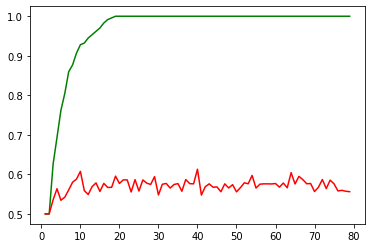

In [ ]:
plt.plot(range(1,80),roc_train,color = 'green')
plt.plot(range(1,80),roc_test,color = 'red')

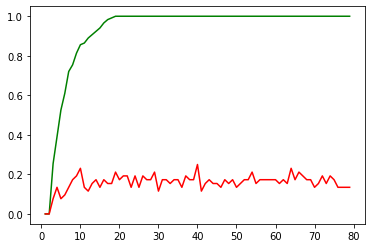

In [ ]:
plt.plot(range(1,80),cv_recal_train_score,color = 'green')
plt.plot(range(1,80),cv_recal_test_score,color = 'red')

In [ ]:
#optimal max depth is 10
dc = DecisionTreeClassifier(max_depth= 10)
parameter = [{
              'min_samples_leaf': [1,5,10,15,30,40],
              'max_leaf_nodes': [1,5,10,15,20],
              'min_samples_split': [1,5,10,15,20],
              'max_features':[5,10,20,25,30]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(dc,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
dc_mdl = gs.fit(xtrain,ytrain)

In [ ]:
dc_mdl.best_params_

{'max_features': 30,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [ ]:
dc_model_1 = DecisionTreeClassifier(max_depth = 10, max_features= 30, max_leaf_nodes=20,min_samples_leaf= 5,min_samples_split=10)
train_acc,train_recall,train_preci,train_f1 = model(dc_model_1,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(dc_model_1,xtrain,ytrain,xtest,ytest,'')
update_test_score_decision('Decision Tree with tuning max_depth = 10, max_features= 30, max_leaf_nodes=20,min_samples_leaf= 5,min_samples_split=10',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_Dec_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Decision Tree without tuning,1.000000,0.960163,1.000000,0.173077,1.000000,0.204545,1.000000,0.187500
1,"Decision Tree with tuning max_depth = 10, max_...",0.982921,0.971910,0.415254,0.192308,0.844828,0.434783,0.556818,0.266667


In [ ]:
dc = DecisionTreeClassifier(max_depth= 10)
parameter = [{
              'min_samples_leaf': [2,3,4,5],
              'max_leaf_nodes': [16,17,18,19,20,25,30,40],
              'min_samples_split': [6,7,8,9,10,11,12,13,14],
              'max_features':[30,35,40,45,50]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(dc,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
dc_mdl = gs.fit(xtrain,ytrain)

In [ ]:
dc_mdl.best_params_

{'max_features': 40,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 11}

In [ ]:
dc_model_2 = DecisionTreeClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=25,min_samples_leaf= 5,min_samples_split = 11)
train_acc,train_recall,train_preci,train_f1 = model(dc_model_2,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(dc_model_2,xtrain,ytrain,xtest,ytest,'')
update_test_score_decision('Decision Tree with tuning max_depth = 10, max_features= 40, max_leaf_nodes=25,min_samples_leaf= 5,min_samples_split = 11',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_Dec_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Decision Tree without tuning,1.000000,0.960163,1.000000,0.173077,1.000000,0.204545,1.000000,0.187500
1,"Decision Tree with tuning max_depth = 10, max_...",0.982921,0.971910,0.415254,0.192308,0.844828,0.434783,0.556818,0.266667
2,"Decision Tree with tuning max_depth = 10, max_...",0.984454,0.967824,0.584746,0.115385,0.758242,0.260870,0.660287,0.160000


In [ ]:
dc = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=5,min_samples_split=11)
parameter = [{
              'max_features':[36,37,38,39,40,41,42,43,44],
              'max_leaf_nodes': [21,22,23,24,25,26,27,28,29]

             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(dc,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
dc_mdl = gs.fit(xtrain,ytrain)

In [ ]:
dc_mdl.best_params_

{'max_features': 40, 'max_leaf_nodes': 24}

In [ ]:
dc_model_3 = DecisionTreeClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11)
train_acc,train_recall,train_preci,train_f1 = model(dc_model_3,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(dc_model_3,xtrain,ytrain,xtest,ytest,'')
update_test_score_decision('Decision Tree with tuning max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_Dec_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Decision Tree without tuning,1.000000,0.960163,1.000000,0.173077,1.000000,0.204545,1.000000,0.187500
1,"Decision Tree with tuning max_depth = 10, max_...",0.982921,0.971910,0.415254,0.192308,0.844828,0.434783,0.556818,0.266667
2,"Decision Tree with tuning max_depth = 10, max_...",0.984454,0.967824,0.584746,0.115385,0.758242,0.260870,0.660287,0.160000
3,"Decision Tree with tuning max_depth = 10, max_...",0.985111,0.967314,0.491525,0.134615,0.878788,0.269231,0.630435,0.179487


In [ ]:
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10},{0:1,1:50},{0:1,1:120},{0:1,1:100},{0:1,1:150}]
parameter = dict(class_weight=balance)
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(dc_model_3,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
dc_mdl = gs.fit(xtrain,ytrain)

In [ ]:
dc_mdl.best_params_

{'class_weight': {0: 1, 1: 100}}

In [ ]:
dc_model_4 = DecisionTreeClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight={0: 1, 1: 100})
train_acc,train_recall,train_preci,train_f1 = model(dc_model_4,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(dc_model_4,xtrain,ytrain,xtest,ytest,'')
update_test_score_decision('Decision Tree with tuning max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight={0: 1, 1: 100}',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_Dec_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Decision Tree without tuning,1.000000,0.960163,1.000000,0.173077,1.000000,0.204545,1.000000,0.187500
1,"Decision Tree with tuning max_depth = 10, max_...",0.982921,0.971910,0.415254,0.192308,0.844828,0.434783,0.556818,0.266667
2,"Decision Tree with tuning max_depth = 10, max_...",0.984454,0.967824,0.584746,0.115385,0.758242,0.260870,0.660287,0.160000
3,"Decision Tree with tuning max_depth = 10, max_...",0.985111,0.967314,0.491525,0.134615,0.878788,0.269231,0.630435,0.179487
4,"Decision Tree with tuning max_depth = 10, max_...",0.887672,0.847804,1.000000,0.615385,0.187005,0.103226,0.315087,0.176796


In [ ]:
dc_model_5 = DecisionTreeClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced")
train_acc,train_recall,train_preci,train_f1 = model(dc_model_5,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(dc_model_5,xtrain,ytrain,xtest,ytest,'')
update_test_score_decision('Decision Tree with tuning max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,,class_weight="balanced',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_Dec_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Decision Tree without tuning,1.000000,0.960163,1.000000,0.173077,1.000000,0.204545,1.000000,0.187500
1,"Decision Tree with tuning max_depth = 10, max_...",0.982921,0.971910,0.415254,0.192308,0.844828,0.434783,0.556818,0.266667
2,"Decision Tree with tuning max_depth = 10, max_...",0.984454,0.967824,0.584746,0.115385,0.758242,0.260870,0.660287,0.160000
3,"Decision Tree with tuning max_depth = 10, max_...",0.985111,0.967314,0.491525,0.134615,0.878788,0.269231,0.630435,0.179487
4,"Decision Tree with tuning max_depth = 10, max_...",0.887672,0.847804,1.000000,0.615385,0.187005,0.103226,0.315087,0.176796
5,"Decision Tree with tuning max_depth = 10, max_...",0.912634,0.885087,0.991525,0.692308,0.227184,0.146939,0.369668,0.242424


In [ ]:
parameter = [{'ccp_alpha':[0.01,0.05,0.10,0.15,0.20,0.50]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(dc_model_5,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
dc_mdl = gs.fit(xtrain,ytrain)

In [ ]:
parameter = [{'ccp_alpha':[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(dc_model_5,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
dc_mdl = gs.fit(xtrain,ytrain)

In [ ]:
dc_mdl.best_params_

{'ccp_alpha': 0.08}

In [ ]:
dc_model_6 =  DecisionTreeClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.08)
train_acc,train_recall,train_preci,train_f1 = model(dc_model_6,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(dc_model_6,xtrain,ytrain,xtest,ytest,'')
update_test_score_decision('Decision Tree with tuning max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.08',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_Dec_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Decision Tree without tuning,1.000000,0.958631,1.000000,0.173077,1.000000,0.191489,1.000000,0.181818
1,"Decision Tree with tuning max_depth = 10, max_...",0.982921,0.965271,0.466102,0.173077,0.785714,0.264706,0.585106,0.209302
2,"Decision Tree with tuning max_depth = 10, max_...",0.984235,0.965781,0.457627,0.173077,0.870968,0.272727,0.600000,0.211765
3,"Decision Tree with tuning max_depth = 10, max_...",0.984673,0.963228,0.491525,0.134615,0.852941,0.205882,0.623656,0.162791
4,"Decision Tree with tuning max_depth = 10, max_...",0.878914,0.866701,1.000000,0.596154,0.175857,0.114391,0.299113,0.191950
5,"Decision Tree with tuning max_depth = 10, max_...",0.900810,0.897855,1.000000,0.596154,0.206655,0.147619,0.342525,0.236641
6,"Decision Tree with tuning max_depth = 10, max_...",0.810379,0.710930,0.754237,0.807692,0.096112,0.070234,0.170498,0.129231


In [ ]:
parameter = [{'ccp_alpha':[0.001,0.0001,0.00001,0,0.01,0.05,0.10,0.15,0.20,0.50]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(dc_model_5,param_grid=parameter,cv=5,scoring=scoring,refit = 'F1')
dc_mdl = gs.fit(xtrain,ytrain)

In [ ]:
dc_mdl.best_params_

{'ccp_alpha': 0.0001}

In [ ]:
dc_model_7 =  DecisionTreeClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)
train_acc,train_recall,train_preci,train_f1 = model(dc_model_7,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(dc_model_7,xtrain,ytrain,xtest,ytest,'')
update_test_score_decision('Decision Tree with tuning max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_Dec_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Decision Tree without tuning,1.000000,0.960163,1.000000,0.240741,1.000000,0.260000,1.000000,0.250000
1,"Decision Tree with tuning max_depth = 10, max_...",0.983797,0.966292,0.439655,0.185185,0.850000,0.312500,0.579545,0.232558
2,"Decision Tree with tuning max_depth = 10, max_...",0.985549,0.962206,0.482759,0.074074,0.903226,0.142857,0.629213,0.097561
3,"Decision Tree with tuning max_depth = 10, max_...",0.984892,0.963228,0.534483,0.185185,0.805195,0.263158,0.642487,0.217391
4,"Decision Tree with tuning max_depth = 10, max_...",0.888329,0.865679,1.000000,0.537037,0.185304,0.108614,0.312668,0.180685
5,"Decision Tree with tuning max_depth = 10, max_...",0.903000,0.866701,1.000000,0.703704,0.207513,0.134276,0.343704,0.225519
6,"Decision Tree with tuning max_depth = 10, max_...",0.692358,0.792135,0.905172,0.722222,0.070047,0.090487,0.130031,0.160825
7,"Decision Tree with tuning max_depth = 10, max_...",0.890957,0.885598,1.000000,0.500000,0.188925,0.120536,0.317808,0.194245


In [ ]:
cross_val_score(dc_model_6,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean()

0.8644927536231884

In [ ]:
cross_val_score(dc_model_6,xtest,ytest,cv = 5 ,scoring = 'recall').mean()

0.7709090909090909

In [ ]:
cross_val_score(dc_model_6,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean()

0.12606154851105583

In [ ]:
cross_val_score(dc_model_6,xtest,ytest,cv = 5 ,scoring = 'f1').mean()

0.13268517661780907

In [ ]:
cross_val_score(dc_model_7,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean()

0.22636232568676035

In [ ]:
cross_val_score(dc_model_7,xtest,ytest,cv = 5 ,scoring = 'f1').mean()

0.22155212287473286

In [ ]:
cross_val_score(dc_model_7,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean()

0.5793478260869566

In [ ]:
cross_val_score(dc_model_7,xtest,ytest,cv = 5 ,scoring = 'recall').mean()

0.40727272727272734

In [ ]:
#DT model 6 is better

In [ ]:
df_dt_threshold = pd.DataFrame(columns=['model','Train threshold','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_dt_thresh(model,train_thresh,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_dt_threshold
    df_dt_threshold = df_dt_threshold.append({'model':model,
                                                     'Train threshold':train_thresh,
                                                     
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)
    
def Thresholdmodel(func,xtrain,ytrain,xtest,ytest,flag,threshold):
    mdl = func.fit(xtrain,ytrain)
    ypred_train_prob = mdl.predict_proba(xtrain)
    ypred_test_prob = mdl.predict_proba(xtest)

    if flag == 'X':
        ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
        return accuracy_score(ytrain,ypred_train),recall_score(ytrain,ypred_train),precision_score(ytrain,ypred_train),f1_score(ytrain,ypred_train)
    else:
        ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
        return accuracy_score(ytest,ypred_test),recall_score(ytest,ypred_test),precision_score(ytest,ypred_test),f1_score(ytest,ypred_test)


def pred_prob_model(func,xtrain,ytrain,xtest,ytest):
    mdl = func.fit(xtrain,ytrain)
    ypred_train = mdl.predict_proba(xtrain)
    ypred_test = mdl.predict_proba(xtest)
    return ypred_train,ypred_test

models = [dc,dc_model_1,dc_model_2,dc_model_3,dc_model_4,dc_model_5,dc_model_6,dc_model_7]

In [ ]:
for i in models:
  ypred_train,ypred_test = pred_prob_model(i,xtrain,ytrain,xtest,ytest)
  fpr, tpr, thresholds = roc_curve(ytrain, ypred_train[:,1])
  youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
  youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
  youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
  #print('for model ' + str(i) + ' best thresold values is:', youdens_table['Threshold'][0])
  train_acc,train_recall,train_preci,train_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'X',youdens_table['Threshold'][0])
  test_acc,test_recall,test_preci,test_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'',youdens_table['Threshold'][0])

  update_test_score_dt_thresh(i,youdens_table['Threshold'][0],train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_dt_threshold

,model,Train threshold,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,DecisionTreeClassifier(),1.000000,0.974600,0.972421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"DecisionTreeClassifier(max_depth=10, max_featu...",0.032419,0.850668,0.917773,0.775862,0.481481,0.120643,0.163522,0.208817,0.244131
2,"DecisionTreeClassifier(max_depth=10, max_featu...",0.032787,0.955332,0.931052,0.681034,0.407407,0.321138,0.176000,0.436464,0.245810
3,"DecisionTreeClassifier(max_depth=10, max_featu...",0.050000,0.953142,0.954545,0.681034,0.277778,0.308594,0.230769,0.424731,0.252101
4,"DecisionTreeClassifier(class_weight={0: 1, 1: ...",0.939261,0.892490,0.946374,0.991379,0.240741,0.190083,0.168831,0.319001,0.198473
5,DecisionTreeClassifier(class_weight='balanced'...,0.864776,0.951609,0.898876,0.655172,0.462963,0.295720,0.128866,0.407507,0.201613
6,"DecisionTreeClassifier(ccp_alpha=0.08, class_w...",0.791286,0.974600,0.972421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"DecisionTreeClassifier(ccp_alpha=0.0001, class...",0.578127,0.890300,0.887130,1.000000,0.500000,0.188006,0.122172,0.316508,0.196364


In [ ]:
#for model 7
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.578127):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.578127):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.578127):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.578127):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.578127):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.578127):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(dc_model_7, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(dc_model_7, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(dc_model_7, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(dc_model_7, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(dc_model_7, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(dc_model_7, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.8426610562687061
avg test recal 0.8569325640704044
avg train f1 0.2955148180903847
avg test f1 0.2783151140196284
avg train prec 0.17939182879047189
avg test prec 0.16837263516935225


In [ ]:
#for model knn model 3
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.791286):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.791286):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.791286):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.791286):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.791286):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.791286):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(dc_model_6, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(dc_model_6, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(dc_model_6, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(dc_model_6, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(dc_model_6, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(dc_model_6, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.0
avg test recal 0.0
avg train f1 0.0
avg test f1 0.0
avg train prec 0.0
avg test prec 0.0


In [ ]:
#for model knn model 3
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.032787):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.032787):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.032787):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.032787):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.032787):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.032787):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(dc_model_3, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(dc_model_3, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(dc_model_3, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(dc_model_3, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(dc_model_3, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(dc_model_3, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.5709150100554284
avg test recal 0.5741872569923492
avg train f1 0.36349159009587517
avg test f1 0.32825350098806766
avg train prec 0.26773515994523367
avg test prec 0.2438992218269261


In [ ]:
#after threshold changing model 7 gives better results

In [ ]:
#RF model

In [ ]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from collections import OrderedDict

In [ ]:
df_RF_scorecard = pd.DataFrame(columns=['model','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score(model,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_RF_scorecard
    df_RF_scorecard = df_RF_scorecard.append({'model':model,
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)

In [ ]:
rfc = RandomForestClassifier()
train_acc,train_recall,train_preci,train_f1 = model(rfc,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(rfc,xtrain,ytrain,xtest,ytest,'')
update_test_score('Random Forest without tuning',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_RF_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Random Forest without tuning,1.0,0.974974,1.0,0.09434,1.0,0.833333,1.0,0.169492


In [ ]:
#dc_model_6 =  DecisionTreeClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.08)

rfc_1 = RandomForestClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.08)
train_acc,train_recall,train_preci,train_f1 = model(rfc_1,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(rfc_1,xtrain,ytrain,xtest,ytest,'')
update_test_score('Random Forest with DT Best Model 1',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_RF_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Random Forest without tuning,1.000000,0.974974,1.000000,0.094340,1.000000,0.833333,1.000000,0.169492
1,Random Forest with DT Best Model 1,0.778848,0.765066,0.854701,0.773585,0.091491,0.083845,0.165289,0.151292


In [ ]:
#dc_model_7 =  DecisionTreeClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)
rfc_2 = RandomForestClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)
train_acc,train_recall,train_preci,train_f1 = model(rfc_2,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(rfc_2,xtrain,ytrain,xtest,ytest,'')
update_test_score('Random Forest with DT Best Model 2',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_RF_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Random Forest without tuning,1.000000,0.974464,1.00000,0.074074,1.000000,1.000000,1.000000,0.137931
1,Random Forest with DT Best Model 1,0.749726,0.766599,0.87069,0.851852,0.082181,0.092929,0.150186,0.167577
2,Random Forest with DT Best Model 2,0.965842,0.946374,1.00000,0.407407,0.426471,0.231579,0.597938,0.295302


In [ ]:
cross_val_score(rfc_1,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean()

0.7873188405797102

In [ ]:
cross_val_score(rfc_1,xtest,ytest,cv = 5 ,scoring = 'recall').mean()

0.790909090909091

In [ ]:
cross_val_score(rfc_1,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean()

0.15480064792837916

In [ ]:
cross_val_score(rfc_1,xtest,ytest,cv = 5 ,scoring = 'f1').mean()

0.20435366123342788

In [ ]:
cross_val_score(rfc_2,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean()

0.4355072463768116

In [ ]:
cross_val_score(rfc_2,xtest,ytest,cv = 5 ,scoring = 'recall').mean()

0.2418181818181818

In [ ]:
cross_val_score(rfc_2,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean()

0.3335821538989865

In [ ]:
cross_val_score(rfc_2,xtest,ytest,cv = 5 ,scoring = 'f1').mean()

0.20096590360282046

In [ ]:
#we will pick rfc_1 model and try to tune f1 score 
df_RF_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Random Forest without tuning,1.000000,0.974974,1.000000,0.094340,1.000000,0.833333,1.000000,0.169492
1,Random Forest with DT Best Model 1,0.778848,0.765066,0.854701,0.773585,0.091491,0.083845,0.165289,0.151292
2,Random Forest with DT Best Model 2,0.970878,0.957099,0.991453,0.396226,0.467742,0.287671,0.635616,0.333333


In [ ]:
#rfc_1 = RandomForestClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.08)

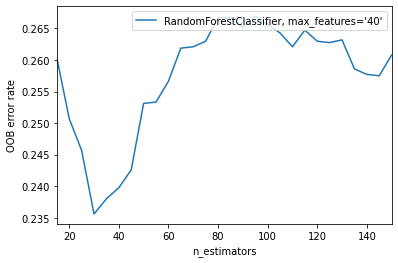

In [ ]:
#tuning Random Forest Classifier
#finding n estimators
#Check Out of Bag Error rate vs n_estimators (RF)
RANDOM_STATE = 123
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='40'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features= 40,
            random_state=RANDOM_STATE,
            max_depth = 10, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.08
        ),
    ),
   
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(xtrain, ytrain)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
recall_lst_train = []
recall_lst_test = []
f1_train_score = []
f1_test_score = []
idx_lst = []
for i in range(20,40):
  mdl = RandomForestClassifier(n_estimators = i,max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.08)
  rf_mdl = mdl.fit(xtrain,ytrain)
  ypred_train = rf_mdl.predict(xtrain)
  ypred_test = rf_mdl.predict(xtest)
  recall_lst_train.append(recall_score(ytrain,ypred_train))
  recall_lst_test.append(recall_score(ytest,ypred_test))
  f1_train_score.append(f1_score(ytrain,ypred_train))
  f1_test_score.append(f1_score(ytest,ypred_test))
  idx_lst.append(i)

In [ ]:
pd.DataFrame(recall_lst_train,idx_lst).sort_values(by = 0,ascending = False)

,0
25,0.897436
29,0.880342
39,0.871795
31,0.871795
38,0.863248
36,0.863248
21,0.863248
20,0.863248
26,0.863248
22,0.863248


In [ ]:
pd.DataFrame(recall_lst_test,idx_lst).sort_values(by = 0,ascending = False)

,0
29,0.849057
31,0.811321
21,0.811321
25,0.811321
20,0.792453
34,0.792453
30,0.792453
26,0.792453
22,0.792453
39,0.792453


In [ ]:
pd.DataFrame(f1_train_score,idx_lst).sort_values(by = 0,ascending = False).head(5)

,0
24,0.188119
37,0.168421
23,0.165401
33,0.162029
28,0.161583


In [ ]:
pd.DataFrame(f1_test_score,idx_lst).sort_values(by = 0,ascending = False).head(5)

,0
24,0.163355
37,0.155039
28,0.152134
33,0.151292
23,0.148976


In [ ]:
rfc_3 = RandomForestClassifier(n_estimators = 37,max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.08)
train_acc,train_recall,train_preci,train_f1 = model(rfc_3,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(rfc_3,xtrain,ytrain,xtest,ytest,'')
update_test_score('Random Forest with DT Best Model 1 n_estimators = 37 ',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_RF_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Random Forest without tuning,1.000000,0.974464,1.000000,0.056604,1.000000,1.000000,1.000000,0.107143
1,Random Forest with DT Best Model 1,0.773812,0.745659,0.837607,0.773585,0.088129,0.077799,0.159479,0.141379
2,Random Forest with DT Best Model 2,0.968469,0.953013,0.991453,0.377358,0.447876,0.253165,0.617021,0.303030
3,Random Forest with DT Best Model 1 n_estimator...,0.775126,0.752809,0.846154,0.716981,0.089350,0.074951,0.161633,0.135714


In [ ]:
print('avg train recall score',cross_val_score(rfc_3,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(rfc_3,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(rfc_3,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(rfc_3,xtest,ytest,cv = 5 ,scoring = 'f1').mean())

avg train recall score 0.761231884057971
avg test recall score 0.7563636363636362
avg train f1 score 0.15113561163839248
avg test f1 score 0.2064019862950138


In [ ]:
#DT best model 2
#RandomForestClassifier(max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)

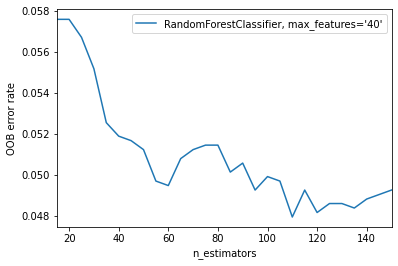

In [ ]:
#tuning Random Forest Classifier
#finding n estimators
#Check Out of Bag Error rate vs n_estimators (RF)
RANDOM_STATE = 123
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='40'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features= 40,
            random_state=RANDOM_STATE,
            max_depth = 10, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001
        ),
    ),
   
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(xtrain, ytrain)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
recall_lst_train = []
recall_lst_test = []
f1_train_score = []
f1_test_score = []
idx_lst = []
for i in range(10,110,10):
  mdl = RandomForestClassifier(n_estimators = i,max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)
  rf_mdl = mdl.fit(xtrain,ytrain)
  ypred_train = rf_mdl.predict(xtrain)
  ypred_test = rf_mdl.predict(xtest)
  recall_lst_train.append(recall_score(ytrain,ypred_train))
  recall_lst_test.append(recall_score(ytest,ypred_test))
  f1_train_score.append(f1_score(ytrain,ypred_train))
  f1_test_score.append(f1_score(ytest,ypred_test))
  idx_lst.append(i)

In [ ]:
pd.DataFrame(recall_lst_train,idx_lst).sort_values(by = 0,ascending = False).head()

,0
50,1.000000
90,1.000000
30,0.991453
40,0.991453
70,0.991453


In [ ]:
pd.DataFrame(recall_lst_test,idx_lst).sort_values(by = 0,ascending = False).head()

,0
30,0.396226
10,0.377358
20,0.377358
40,0.377358
70,0.377358


In [ ]:
pd.DataFrame(f1_train_score,idx_lst).sort_values(by = 0,ascending = False).head(10)

,0
70,0.664756
80,0.657224
100,0.657224
60,0.657061
90,0.642857
30,0.640884
50,0.622340
40,0.612137
10,0.589474
20,0.555831


In [ ]:
pd.DataFrame(f1_test_score,idx_lst).sort_values(by = 0,ascending = False).head(5)

,0
30,0.336000
70,0.325203
100,0.325203
90,0.314961
60,0.300000


In [ ]:
rfc_4 = RandomForestClassifier(n_estimators = 30,max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)
train_acc,train_recall,train_preci,train_f1 = model(rfc_4,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(rfc_4,xtrain,ytrain,xtest,ytest,'')
update_test_score('Random Forest with DT Best Model 2 n_estimators = 30 ',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_RF_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Random Forest without tuning,1.000000,0.974464,1.000000,0.074074,1.000000,1.000000,1.000000,0.137931
1,Random Forest with DT Best Model 1,0.749726,0.766599,0.870690,0.851852,0.082181,0.092929,0.150186,0.167577
2,Random Forest with DT Best Model 2,0.965842,0.946374,1.000000,0.407407,0.426471,0.231579,0.597938,0.295302
3,Random Forest with DT Best Model 1 n_estimator...,0.759361,0.740552,0.870690,0.851852,0.085232,0.084249,0.155265,0.153333
4,Random Forest with DT Best Model 2 n_estimator...,0.966061,0.945352,0.982759,0.425926,0.426966,0.232323,0.595300,0.300654


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
print('avg train recall score',cross_val_score(rfc_4,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(rfc_4,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(rfc_4,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(rfc_4,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(rfc_4,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(rfc_4,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.4358695652173913
avg test recall score 0.18545454545454546
avg train f1 score 0.35858383638013586
avg test f1 score 0.3009271255060729
avg train precision score 0.3023296278031464
avg test precision score 0.2523809523809524


In [ ]:
print('avg train recall score',cross_val_score(rfc_3,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(rfc_3,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(rfc_3,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(rfc_3,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(rfc_3,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(rfc_3,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.7869565217391304
avg test recall score 0.7545454545454545
avg train f1 score 0.15453916709419788
avg test f1 score 0.20139801661752882
avg train precision score 0.0853491712036398
avg test precision score 0.12448173147094077


In [ ]:
#criterion,min_weight_fraction_leaf,

In [ ]:
parameter = [{'criterion':['entropy','gini','log_loss'],
              'min_weight_fraction_leaf':[0,0.1,0.2,0.3]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(rfc_3,param_grid=parameter,cv=5,scoring=scoring,refit = 'F1')
dc_mdl = gs.fit(xtrain,ytrain)

In [ ]:
dc_mdl.best_params_

{'criterion': 'entropy', 'min_weight_fraction_leaf': 0}

In [ ]:
rfc_5 = RandomForestClassifier(n_estimators = 30,criterion = 'entropy',max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)
train_acc,train_recall,train_preci,train_f1 = model(rfc_5,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(rfc_5,xtrain,ytrain,xtest,ytest,'')
update_test_score('Random Forest with rf_3 extention ',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_RF_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Random Forest without tuning,1.000000,0.974464,1.000000,0.056604,1.000000,1.000000,1.000000,0.107143
1,Random Forest with DT Best Model 1,0.773812,0.745659,0.837607,0.773585,0.088129,0.077799,0.159479,0.141379
2,Random Forest with DT Best Model 2,0.968469,0.953013,0.991453,0.377358,0.447876,0.253165,0.617021,0.303030
3,Random Forest with DT Best Model 1 n_estimator...,0.775126,0.752809,0.846154,0.716981,0.089350,0.074951,0.161633,0.135714
4,Random Forest with DT Best Model 2 n_estimator...,0.968032,0.953524,0.974359,0.358491,0.443580,0.250000,0.609626,0.294574
5,Random Forest with rf_3 extention,0.979199,0.960163,0.974359,0.433962,0.553398,0.323944,0.705882,0.370968


In [ ]:
parameter = [{'criterion':['entropy','gini','log_loss'],
              'min_weight_fraction_leaf':[0,0.1,0.2,0.3]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(rfc_4,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
dc_mdl = gs.fit(xtrain,ytrain)

In [ ]:
dc_mdl.best_params_

{'criterion': 'gini', 'min_weight_fraction_leaf': 0.1}

In [ ]:
rfc_6 = RandomForestClassifier(n_estimators = 30,min_weight_fraction_leaf = 0.1,max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)
train_acc,train_recall,train_preci,train_f1 = model(rfc_6,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(rfc_6,xtrain,ytrain,xtest,ytest,'')
update_test_score('Random Forest with rf_4 extention ',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_RF_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Random Forest without tuning,1.000000,0.974464,1.000000,0.056604,1.000000,1.000000,1.000000,0.107143
1,Random Forest with DT Best Model 1,0.773812,0.745659,0.837607,0.773585,0.088129,0.077799,0.159479,0.141379
2,Random Forest with DT Best Model 2,0.968469,0.953013,0.991453,0.377358,0.447876,0.253165,0.617021,0.303030
3,Random Forest with DT Best Model 1 n_estimator...,0.775126,0.752809,0.846154,0.716981,0.089350,0.074951,0.161633,0.135714
4,Random Forest with DT Best Model 2 n_estimator...,0.968032,0.953524,0.974359,0.358491,0.443580,0.250000,0.609626,0.294574
5,Random Forest with rf_3 extention,0.979199,0.960163,0.974359,0.433962,0.553398,0.323944,0.705882,0.370968
6,Random Forest with rf_4 extention,0.816948,0.804392,0.888889,0.830189,0.112190,0.105263,0.199234,0.186837


In [ ]:
print('avg train recall score',cross_val_score(rfc_5,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(rfc_5,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(rfc_5,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(rfc_5,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(rfc_5,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(rfc_5,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.35543478260869565
avg test recall score 0.14727272727272728
avg train f1 score 0.3168009768009768
avg test f1 score 0.23928571428571432
avg train precision score 0.3382167832167833
avg test precision score 0.5071428571428571


In [ ]:
print('avg train recall score',cross_val_score(rfc_6,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(rfc_6,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(rfc_6,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(rfc_6,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(rfc_6,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(rfc_6,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.7855072463768116
avg test recall score 0.7254545454545454
avg train f1 score 0.2129117991164196
avg test f1 score 0.26379029666273196
avg train precision score 0.11670639283333965
avg test precision score 0.16197616417767421


In [ ]:
#rf conclusion rfc_6 is by far the good model
#let us try threshold adjustment for all the models built

In [ ]:
#threshold changing
df_rf_threshold = pd.DataFrame(columns=['model','Train threshold','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_rf_thresh(model,train_thresh,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_rf_threshold
    df_rf_threshold = df_rf_threshold.append({'model':model,
                                                     'Train threshold':train_thresh,
                                                     
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)
    
def Thresholdmodel(func,xtrain,ytrain,xtest,ytest,flag,threshold):
    mdl = func.fit(xtrain,ytrain)
    ypred_train_prob = mdl.predict_proba(xtrain)
    ypred_test_prob = mdl.predict_proba(xtest)

    if flag == 'X':
        ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
        return accuracy_score(ytrain,ypred_train),recall_score(ytrain,ypred_train),precision_score(ytrain,ypred_train),f1_score(ytrain,ypred_train)
    else:
        ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
        return accuracy_score(ytest,ypred_test),recall_score(ytest,ypred_test),precision_score(ytest,ypred_test),f1_score(ytest,ypred_test)


def pred_prob_model(func,xtrain,ytrain,xtest,ytest):
    mdl = func.fit(xtrain,ytrain)
    ypred_train = mdl.predict_proba(xtrain)
    ypred_test = mdl.predict_proba(xtest)
    return ypred_train,ypred_test

models = [rfc,rfc_1,rfc_2,rfc_3,rfc_4,rfc_5,rfc_6]

In [ ]:
models = [rfc,rfc_1,rfc_2,rfc_3,rfc_4,rfc_5,rfc_6]

In [ ]:
for i in models:
  ypred_train,ypred_test = pred_prob_model(i,xtrain,ytrain,xtest,ytest)
  fpr, tpr, thresholds = roc_curve(ytrain, ypred_train[:,1])
  youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
  youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
  youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
  #print('for model ' + str(i) + ' best thresold values is:', youdens_table['Threshold'][0])
  train_acc,train_recall,train_preci,train_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'X',youdens_table['Threshold'][0])
  test_acc,test_recall,test_preci,test_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'',youdens_table['Threshold'][0])

  update_test_score_rf_thresh(i,youdens_table['Threshold'][0],train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_rf_threshold

,model,Train threshold,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,"(DecisionTreeClassifier(max_features='auto', r...",0.560000,0.999781,0.972932,0.991379,0.018519,1.000000,1.000000,0.995671,0.036364
1,"(DecisionTreeClassifier(ccp_alpha=0.08, max_de...",0.587839,0.800744,0.812564,0.862069,0.777778,0.100604,0.105793,0.180180,0.186253
2,"(DecisionTreeClassifier(ccp_alpha=0.0001, max_...",0.550024,0.971316,0.951992,0.982759,0.388889,0.469136,0.256098,0.635097,0.308824
3,"(DecisionTreeClassifier(ccp_alpha=0.08, max_de...",0.509053,0.766586,0.775792,0.870690,0.833333,0.087674,0.094737,0.159306,0.170132
4,"(DecisionTreeClassifier(ccp_alpha=0.0001, max_...",0.502093,0.966061,0.943309,0.974138,0.407407,0.426415,0.217822,0.593176,0.283871
5,"(DecisionTreeClassifier(ccp_alpha=0.0001, crit...",0.446612,0.973068,0.951481,1.000000,0.407407,0.485356,0.258824,0.653521,0.316547
6,"(DecisionTreeClassifier(ccp_alpha=0.0001, max_...",0.506933,0.848916,0.828396,0.887931,0.814815,0.132051,0.118919,0.229911,0.207547


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
#for model 6
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.506933):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.506933):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.506933):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.506933):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.506933):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.506933):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(rfc_6, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(rfc_6, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(rfc_6, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(rfc_6, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(rfc_6, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(rfc_6, X_train_k, X_test_k, y_train_k, y_test_k))
    
print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.8605883182499212
avg test recal 0.8924321668966094
avg train f1 0.2010387427949217
avg test f1 0.18491665790777492
avg train prec 0.11396818799833505
avg test prec 0.10517342875483524


In [ ]:
#for model 5
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.446612):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.446612):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.446612):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.446612):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.446612):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.446612):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(rfc_5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(rfc_5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(rfc_5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(rfc_5, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(rfc_5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(rfc_5, X_train_k, X_test_k, y_train_k, y_test_k))
    
print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.8070321376169985
avg test recal 0.8251557339353652
avg train f1 0.5565256188756961
avg test f1 0.5356181973437353
avg train prec 0.4250358561646224
avg test prec 0.40101373024899545


In [ ]:
#gradient boosting
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
df_xg_scorecard = pd.DataFrame(columns=['model','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score(model,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_xg_scorecard
    df_xg_scorecard = df_xg_scorecard.append({'model':model,
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)

In [ ]:
gb = GradientBoostingClassifier()
train_acc,train_recall,train_preci,train_f1 = model(gb,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb,xtrain,ytrain,xtest,ytest,'')
update_test_score('Gradient Boosting without tuning',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
#rfc_6 = RandomForestClassifier(n_estimators = 30,min_weight_fraction_leaf = 0.1,max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)
rfc_5 = RandomForestClassifier(n_estimators = 30,criterion = 'entropy',max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)
gb_1 = GradientBoostingClassifier(init= rfc_5)
train_acc,train_recall,train_preci,train_f1 = model(gb_1,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb_1,xtrain,ytrain,xtest,ytest,'')
update_test_score('Gradient Boosting with RF initializer',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Gradient Boosting without tuning,0.993650,0.967314,0.750000,0.148148,1.0,0.307692,0.857143,0.200000
1,Gradient Boosting with RF initializer,0.992774,0.973442,0.715517,0.129630,1.0,0.583333,0.834171,0.212121


In [ ]:
parameter = [{'loss':['exponential','deviance','log_loss'],
              'learning_rate':[0.5, 0.2, 0.25, 0.1, 0.05, 0.01]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_1,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'learning_rate': 0.5, 'loss': 'exponential'}

In [ ]:
gb_2 = GradientBoostingClassifier(learning_rate= 0.5,loss = 'exponential',init= rfc_5)
train_acc,train_recall,train_preci,train_f1 = model(gb_2,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb_2,xtrain,ytrain,xtest,ytest,'')
update_test_score("Gradient Boosting with RF initializer learning_rate= 0.5,loss = 'exponential',init= rfc_5" ,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Gradient Boosting without tuning,0.993650,0.967314,0.750000,0.148148,1.0,0.307692,0.857143,0.200000
1,Gradient Boosting with RF initializer,0.992774,0.973442,0.715517,0.129630,1.0,0.583333,0.834171,0.212121
2,Gradient Boosting with RF initializer learning...,1.000000,0.974464,1.000000,0.185185,1.0,0.625000,1.000000,0.285714


In [ ]:
#threshold adjustment

In [ ]:
#threshold change
#threshold changing
df_xg_threshold = pd.DataFrame(columns=['model','Train threshold','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_xg_thresh(model,train_thresh,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_xg_threshold
    df_xg_threshold = df_xg_threshold.append({'model':model,
                                                     'Train threshold':train_thresh,
                                                     
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)
    
def Thresholdmodel(func,xtrain,ytrain,xtest,ytest,flag,threshold):
    mdl = func.fit(xtrain,ytrain)
    ypred_train_prob = mdl.predict_proba(xtrain)
    ypred_test_prob = mdl.predict_proba(xtest)

    if flag == 'X':
        ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
        return accuracy_score(ytrain,ypred_train),recall_score(ytrain,ypred_train),precision_score(ytrain,ypred_train),f1_score(ytrain,ypred_train)
    else:
        ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
        return accuracy_score(ytest,ypred_test),recall_score(ytest,ypred_test),precision_score(ytest,ypred_test),f1_score(ytest,ypred_test)


def pred_prob_model(func,xtrain,ytrain,xtest,ytest):
    mdl = func.fit(xtrain,ytrain)
    ypred_train = mdl.predict_proba(xtrain)
    ypred_test = mdl.predict_proba(xtest)
    return ypred_train,ypred_test

In [ ]:
models = [gb,gb_1,gb_2]
for i in models:
  ypred_train,ypred_test = pred_prob_model(i,xtrain,ytrain,xtest,ytest)
  fpr, tpr, thresholds = roc_curve(ytrain, ypred_train[:,1])
  youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
  youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
  youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
  #print('for model ' + str(i) + ' best thresold values is:', youdens_table['Threshold'][0])
  train_acc,train_recall,train_preci,train_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'X',youdens_table['Threshold'][0])
  test_acc,test_recall,test_preci,test_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'',youdens_table['Threshold'][0])

  update_test_score_xg_thresh(i,youdens_table['Threshold'][0],train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_threshold

,model,Train threshold,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,([DecisionTreeRegressor(criterion='friedman_ms...,0.228391,0.997153,0.964249,0.982759,0.333333,0.912000,0.346154,0.946058,0.339623
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.169414,0.994307,0.967824,0.982759,0.425926,0.826087,0.418182,0.897638,0.422018
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.680372,0.999124,0.974974,0.965517,0.166667,1.000000,0.692308,0.982456,0.268657


In [ ]:
#for model 1
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.169414):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.169414):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.169414):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.169414):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.169414):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.169414):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(gb_1, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(gb_1, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(gb_1, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(gb_1, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(gb_1, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(gb_1, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7882660890357098
avg test recal 0.7787215184581295
avg train f1 0.7336804285356604
avg test f1 0.7229671502803929
avg train prec 0.6873194794886273
avg test prec 0.6789364531237596


In [ ]:
#for model 2
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.680372):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.680372):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.680372):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.680372):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.680372):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.680372):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7188900535021839
avg test recal 0.7391920648856558
avg train f1 0.8251215467733003
avg test f1 0.8390534856300244
avg train prec 0.9682706014988287
avg test prec 0.9717915214866434


In [ ]:
parameter = [{'n_estimators':[3,5,7,9],
              'max_depth':[2,5,7,9],
              'min_samples_split':[3,5,7,9],
              'min_samples_leaf':[2,4,7,9],
              'min_weight_fraction_leaf':[0,0.01,0.05,0.1,0.2],
              'max_features':[3,5,7,9],
              'max_leaf_nodes':[2,4,6,8],
              'tol':[0.2,0.3,0.4,0.5,1,3,5],
              'ccp_alpha':[0,0.0001,0.00001,0.01,0.001],
              'loss':['exponential','deviance','log_loss'],
              'learning_rate':[0.5, 0.2, 0.25, 0.1, 0.05, 0.01]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_2,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

KeyboardInterrupt: ignored

In [ ]:
gs_mdl.best_params_

{'n_estimators': 5}

In [ ]:
parameter = [{'n_estimators':[1,2,3,4,5,6,7,8,9]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_2,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'n_estimators': 2}

In [ ]:
gb_3 = GradientBoostingClassifier(n_estimators = 2,learning_rate= 0.01,loss = 'deviance',init= rfc_5)
train_acc,train_recall,train_preci,train_f1 = model(gb_3,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb_3,xtrain,ytrain,xtest,ytest,'')
update_test_score("Gradient Boosting with RF initializer n_estimators = 2,learning_rate= 0.01,loss = 'deviance',init= rfc_6" ,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Gradient Boosting without tuning,0.993650,0.967314,0.750000,0.148148,1.000000,0.307692,0.857143,0.200000
1,Gradient Boosting with RF initializer,0.992774,0.973442,0.715517,0.129630,1.000000,0.583333,0.834171,0.212121
2,Gradient Boosting with RF initializer learning...,1.000000,0.974464,1.000000,0.185185,1.000000,0.625000,1.000000,0.285714
3,Gradient Boosting with RF initializer n_estima...,0.981169,0.954545,1.000000,0.333333,0.574257,0.253521,0.729560,0.288000


In [ ]:
#lets check for cv for model 3 to see if the recall is good or not
print('avg train recall score',cross_val_score(gb_3,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(gb_3,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(gb_3,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(gb_3,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(gb_3,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(gb_3,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.82
avg test recall score 0.5511111111111111
avg train f1 score 0.2169844839014438
avg test f1 score 0.19094833863449284
avg train precision score 0.12131741013070103
avg test precision score 0.11462720338673771


In [ ]:
parameter = [{'min_samples_split':[2,5,10,15,20]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_3,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'min_samples_split': 5}

In [ ]:
parameter = [{'min_samples_split':[3,4,5,6,7,8,9]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_3,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'min_samples_split': 4}

In [ ]:
gb_4 = GradientBoostingClassifier(n_estimators = 2,learning_rate= 0.01,min_samples_split = 4,loss = 'deviance',init= rfc_5)
train_acc,train_recall,train_preci,train_f1 = model(gb_4,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb_4,xtrain,ytrain,xtest,ytest,'')
update_test_score("Gradient Boosting with RF initializer n_estimators = 2,learning_rate= 0.01,min_samples_split = 4,loss = 'deviance',init= rfc_6" ,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Gradient Boosting without tuning,0.993650,0.967314,0.750000,0.148148,1.000000,0.307692,0.857143,0.200000
1,Gradient Boosting with RF initializer,0.992774,0.973442,0.715517,0.129630,1.000000,0.583333,0.834171,0.212121
2,Gradient Boosting with RF initializer learning...,1.000000,0.974464,1.000000,0.185185,1.000000,0.625000,1.000000,0.285714
3,Gradient Boosting with RF initializer n_estima...,0.981169,0.954545,1.000000,0.333333,0.574257,0.253521,0.729560,0.288000
4,Gradient Boosting with RF initializer n_estima...,0.983140,0.958631,0.982759,0.351852,0.603175,0.292308,0.747541,0.319328


In [ ]:
print('avg train recall score',cross_val_score(gb_4,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(gb_4,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(gb_4,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(gb_4,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(gb_4,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(gb_4,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.8029999999999999
avg test recall score 0.571111111111111
avg train f1 score 0.2130742767924351
avg test f1 score 0.18773473251164047
avg train precision score 0.12171587172112257
avg test precision score 0.11609871023470837


In [ ]:
parameter = [{'min_samples_leaf':[6,7,8,9,10,11,12,13,14],
              'min_weight_fraction_leaf':[0,0.01,0.05,0.1,0.4,0.5]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_4,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.1}

In [ ]:
gb_5 = GradientBoostingClassifier(n_estimators = 2,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_5)
train_acc,train_recall,train_preci,train_f1 = model(gb_5,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb_5,xtrain,ytrain,xtest,ytest,'')
update_test_score("Gradient Boosting with RF initializer n_estimators = 2,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_6" ,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Gradient Boosting without tuning,0.992993,0.974464,0.739837,0.191489,1.000000,0.428571,0.850467,0.264706
1,Gradient Boosting with RF initializer,0.991023,0.974974,0.666667,0.170213,1.000000,0.444444,0.800000,0.246154
2,Gradient Boosting with RF initializer learning...,0.974162,0.972932,0.382114,0.276596,0.528090,0.406250,0.443396,0.329114
3,Gradient Boosting with RF initializer n_estima...,0.832275,0.817160,0.926829,0.829787,0.130884,0.100257,0.229376,0.178899
4,Gradient Boosting with RF initializer n_estima...,0.821765,0.829418,0.894309,0.851064,0.120746,0.108992,0.212766,0.193237
5,Gradient Boosting with RF initializer n_estima...,0.824173,0.842186,0.918699,0.829787,0.124724,0.114706,0.219631,0.201550


In [ ]:
parameter = [{'max_depth':[2,5,10,15,20,25,30],
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_5,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'max_depth': 20}

In [ ]:
parameter = [{'max_depth':[16,17,18,19,20,21,22,23,24],
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_5,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'max_depth': 16}

In [ ]:
gb_6 = GradientBoostingClassifier(n_estimators = 2,max_depth = 16,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_5)
train_acc,train_recall,train_preci,train_f1 = model(gb_6,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb_6,xtrain,ytrain,xtest,ytest,'')
update_test_score("Gradient Boosting with RF initializer n_estimators = 2,max_depth = 16,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_6" ,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Gradient Boosting without tuning,0.992993,0.974464,0.739837,0.191489,1.000000,0.428571,0.850467,0.264706
1,Gradient Boosting with RF initializer,0.991023,0.974974,0.666667,0.170213,1.000000,0.444444,0.800000,0.246154
2,Gradient Boosting with RF initializer learning...,0.974162,0.972932,0.382114,0.276596,0.528090,0.406250,0.443396,0.329114
3,Gradient Boosting with RF initializer n_estima...,0.832275,0.817160,0.926829,0.829787,0.130884,0.100257,0.229376,0.178899
4,Gradient Boosting with RF initializer n_estima...,0.821765,0.829418,0.894309,0.851064,0.120746,0.108992,0.212766,0.193237
5,Gradient Boosting with RF initializer n_estima...,0.824173,0.842186,0.918699,0.829787,0.124724,0.114706,0.219631,0.201550
6,Gradient Boosting with RF initializer n_estima...,0.839282,0.827886,0.910569,0.808511,0.134132,0.103825,0.233820,0.184019


In [ ]:
parameter = [{'max_features':[2,5,10,15,20,25,30]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_6,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'max_features': 10}

In [ ]:
parameter = [{'max_features':[5,6,7,8,9,10,11,12,13,14,15]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_6,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'max_features': 9}

In [ ]:
gb_7 = GradientBoostingClassifier(n_estimators = 2,max_depth = 16,max_features = 9,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_5)
train_acc,train_recall,train_preci,train_f1 = model(gb_7,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb_7,xtrain,ytrain,xtest,ytest,'')
update_test_score("Gradient Boosting with RF initializer n_estimators = 2,max_depth = 16,max_features = 9,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_6" ,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Gradient Boosting without tuning,0.992993,0.974464,0.739837,0.191489,1.000000,0.428571,0.850467,0.264706
1,Gradient Boosting with RF initializer,0.991023,0.974974,0.666667,0.170213,1.000000,0.444444,0.800000,0.246154
2,Gradient Boosting with RF initializer learning...,0.974162,0.972932,0.382114,0.276596,0.528090,0.406250,0.443396,0.329114
3,Gradient Boosting with RF initializer n_estima...,0.832275,0.817160,0.926829,0.829787,0.130884,0.100257,0.229376,0.178899
4,Gradient Boosting with RF initializer n_estima...,0.821765,0.829418,0.894309,0.851064,0.120746,0.108992,0.212766,0.193237
5,Gradient Boosting with RF initializer n_estima...,0.824173,0.842186,0.918699,0.829787,0.124724,0.114706,0.219631,0.201550
6,Gradient Boosting with RF initializer n_estima...,0.839282,0.827886,0.910569,0.808511,0.134132,0.103825,0.233820,0.184019
7,Gradient Boosting with RF initializer n_estima...,0.847164,0.805924,0.918699,0.808511,0.141074,0.092910,0.244589,0.166667


In [ ]:
print('avg train recall score',cross_val_score(gb_7,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(gb_7,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(gb_7,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(gb_7,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(gb_7,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(gb_7,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.7866666666666666
avg test recall score 0.5133333333333333
avg train f1 score 0.21570918833054759
avg test f1 score 0.17689034936008302
avg train precision score 0.12152350266800811
avg test precision score 0.11875676723546906


In [ ]:
parameter = [{'max_leaf_nodes':[2,5,10,15,20]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_7,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'max_leaf_nodes': 15}

In [ ]:
parameter = [{'max_leaf_nodes':[10,11,12,13,14,15,16,17,18,19,20]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_7,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'max_leaf_nodes': 18}

In [ ]:
gb_8 = GradientBoostingClassifier(n_estimators = 2,max_depth = 16,max_features = 9,max_leaf_nodes = 18,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_5)
train_acc,train_recall,train_preci,train_f1 = model(gb_8,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb_8,xtrain,ytrain,xtest,ytest,'')
update_test_score("Gradient Boosting with RF initializer n_estimators = 2,max_depth = 16,max_features = 9,max_leaf_nodes = 18,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_6" ,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Gradient Boosting without tuning,0.992993,0.974464,0.739837,0.191489,1.000000,0.428571,0.850467,0.264706
1,Gradient Boosting with RF initializer,0.991023,0.974974,0.666667,0.170213,1.000000,0.444444,0.800000,0.246154
2,Gradient Boosting with RF initializer learning...,0.974162,0.972932,0.382114,0.276596,0.528090,0.406250,0.443396,0.329114
3,Gradient Boosting with RF initializer n_estima...,0.832275,0.817160,0.926829,0.829787,0.130884,0.100257,0.229376,0.178899
4,Gradient Boosting with RF initializer n_estima...,0.821765,0.829418,0.894309,0.851064,0.120746,0.108992,0.212766,0.193237
5,Gradient Boosting with RF initializer n_estima...,0.824173,0.842186,0.918699,0.829787,0.124724,0.114706,0.219631,0.201550
6,Gradient Boosting with RF initializer n_estima...,0.839282,0.827886,0.910569,0.808511,0.134132,0.103825,0.233820,0.184019
7,Gradient Boosting with RF initializer n_estima...,0.847164,0.805924,0.918699,0.808511,0.141074,0.092910,0.244589,0.166667
8,Gradient Boosting with RF initializer n_estima...,0.842128,0.825843,0.886179,0.829787,0.133578,0.104839,0.232162,0.186158


In [ ]:
parameter = [{'tol':[0.2,0.3,0.4,0.5,1,3,5],
              'ccp_alpha':[0,0.0001,0.00001,0.01,0.001]
             }]
scoring = {"F1": "f1", "recall": 'recall' }
gs = GridSearchCV(gb_8,param_grid=parameter,cv=5,scoring=scoring,refit = 'recall')
gs_mdl = gs.fit(xtrain,ytrain)

In [ ]:
gs_mdl.best_params_

{'ccp_alpha': 0.0001, 'tol': 0.2}

In [ ]:
gb_9 = GradientBoostingClassifier(n_estimators = 2,ccp_alpha = 0.0001,tol = 0.2,max_depth = 16,max_features = 9,max_leaf_nodes = 18,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_5)
train_acc,train_recall,train_preci,train_f1 = model(gb_9,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(gb_9,xtrain,ytrain,xtest,ytest,'')
update_test_score("Gradient Boosting with RF initializer n_estimators = 2,ccp_alpha = 0.0001,tol = 0.2,max_depth = 16,max_features = 9,max_leaf_nodes = 18,learning_rate= 0.01,min_samples_split = 4,min_samples_leaf = 9,min_weight_fraction_leaf = 0.1,loss = 'deviance',init= rfc_6" ,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Gradient Boosting without tuning,0.993650,0.967314,0.750000,0.148148,1.000000,0.307692,0.857143,0.200000
1,Gradient Boosting with RF initializer,0.992774,0.973442,0.715517,0.129630,1.000000,0.583333,0.834171,0.212121
2,Gradient Boosting with RF initializer learning...,1.000000,0.974464,1.000000,0.185185,1.000000,0.625000,1.000000,0.285714
3,Gradient Boosting with RF initializer n_estima...,0.981169,0.954545,1.000000,0.333333,0.574257,0.253521,0.729560,0.288000
4,Gradient Boosting with RF initializer n_estima...,0.983140,0.958631,0.982759,0.351852,0.603175,0.292308,0.747541,0.319328
5,Gradient Boosting with RF initializer n_estima...,0.980293,0.959142,0.974138,0.388889,0.565000,0.308824,0.715190,0.344262
6,Gradient Boosting with RF initializer n_estima...,0.982921,0.952503,0.956897,0.351852,0.603261,0.246753,0.740000,0.290076
7,Gradient Boosting with RF initializer n_estima...,0.980293,0.959142,0.965517,0.351852,0.565657,0.296875,0.713376,0.322034
8,Gradient Boosting with RF initializer n_estima...,0.978761,0.960163,0.974138,0.351852,0.545894,0.306452,0.699690,0.327586
9,Gradient Boosting with RF initializer n_estima...,0.980512,0.959142,0.982759,0.425926,0.567164,0.319444,0.719243,0.365079


In [ ]:
print('avg train recall score',cross_val_score(gb_9,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(gb_9,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(gb_9,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(gb_9,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(gb_9,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(gb_9,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.8033333333333333
avg test recall score 0.5111111111111111
avg train f1 score 0.2116678303065737
avg test f1 score 0.18683982513347905
avg train precision score 0.12257573920009332
avg test precision score 0.11507881773399016


In [ ]:
#threshold change
#threshold changing
df_xg_threshold = pd.DataFrame(columns=['model','Train threshold','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_xg_thresh(model,train_thresh,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_xg_threshold
    df_xg_threshold = df_xg_threshold.append({'model':model,
                                                     'Train threshold':train_thresh,
                                                     
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)
    
def Thresholdmodel(func,xtrain,ytrain,xtest,ytest,flag,threshold):
    mdl = func.fit(xtrain,ytrain)
    ypred_train_prob = mdl.predict_proba(xtrain)
    ypred_test_prob = mdl.predict_proba(xtest)

    if flag == 'X':
        ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
        return accuracy_score(ytrain,ypred_train),recall_score(ytrain,ypred_train),precision_score(ytrain,ypred_train),f1_score(ytrain,ypred_train)
    else:
        ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
        return accuracy_score(ytest,ypred_test),recall_score(ytest,ypred_test),precision_score(ytest,ypred_test),f1_score(ytest,ypred_test)


def pred_prob_model(func,xtrain,ytrain,xtest,ytest):
    mdl = func.fit(xtrain,ytrain)
    ypred_train = mdl.predict_proba(xtrain)
    ypred_test = mdl.predict_proba(xtest)
    return ypred_train,ypred_test

In [ ]:
models = [gb,gb_1,gb_2,gb_3,gb_4,gb_5,gb_6,gb_7,gb_8,gb_9]
for i in models:
  ypred_train,ypred_test = pred_prob_model(i,xtrain,ytrain,xtest,ytest)
  fpr, tpr, thresholds = roc_curve(ytrain, ypred_train[:,1])
  youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
  youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
  youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
  #print('for model ' + str(i) + ' best thresold values is:', youdens_table['Threshold'][0])
  train_acc,train_recall,train_preci,train_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'X',youdens_table['Threshold'][0])
  test_acc,test_recall,test_preci,test_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'',youdens_table['Threshold'][0])

  update_test_score_xg_thresh(i,youdens_table['Threshold'][0],train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_xg_threshold

,model,Train threshold,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,([DecisionTreeRegressor(criterion='friedman_ms...,0.228391,0.997153,0.969867,0.965517,0.407407,0.925620,0.448980,0.945148,0.427184
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.141135,0.991679,0.964760,0.991379,0.351852,0.756579,0.358491,0.858209,0.355140
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.573197,0.999562,0.974464,0.982759,0.203704,1.000000,0.611111,0.991304,0.305556
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.448326,0.971097,0.947395,0.991379,0.481481,0.467480,0.257426,0.635359,0.335484
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.507085,0.982264,0.956588,0.939655,0.370370,0.595628,0.281690,0.729097,0.320000
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.492030,0.975038,0.961696,0.974138,0.444444,0.504464,0.347826,0.664706,0.390244
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.463074,0.975257,0.951481,1.000000,0.370370,0.506550,0.246914,0.672464,0.296296
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.428673,0.972630,0.945863,0.991379,0.444444,0.481172,0.240000,0.647887,0.311688
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.488033,0.977228,0.953524,0.991379,0.351852,0.527523,0.253333,0.688623,0.294574
9,"([DecisionTreeRegressor(ccp_alpha=0.0001, crit...",0.494871,0.977009,0.951481,1.000000,0.351852,0.524887,0.240506,0.688427,0.285714


In [ ]:
#for model 9
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.494871):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.494871):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.494871):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.494871):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.494871):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.494871):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(gb_9, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(gb_9, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(gb_9, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(gb_9, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(gb_9, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(gb_9, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7769004932207332
avg test recal 0.7823228395835946
avg train f1 0.5769362917123266
avg test f1 0.5661248403154047
avg train prec 0.4593178359670057
avg test prec 0.446250867005843


In [ ]:
#for model 2
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.573197):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.573197):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.573197):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.573197):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.573197):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.573197):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(gb_2, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7431196424152378
avg test recal 0.7714329612441991
avg train f1 0.8304073039423668
avg test f1 0.8523824082750944
avg train prec 0.9410745903850277
avg test prec 0.9535555555555554


In [ ]:
#for model 4
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.507085):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.507085):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.507085):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.507085):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.507085):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.507085):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(gb_4, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(gb_4, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(gb_4, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(gb_4, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(gb_4, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(gb_4, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7769004932207332
avg test recal 0.7823228395835946
avg train f1 0.5821195344227494
avg test f1 0.5727453439428012
avg train prec 0.46591750429025885
avg test prec 0.4542928039702233


In [ ]:
#for gb no tuned model
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.228391):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.228391):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.228391):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.228391):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.228391):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.228391):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(gb, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(gb, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(gb, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(gb, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(gb, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(gb, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7874273024356363
avg test recal 0.767786905807099
avg train f1 0.7880375477092622
avg test f1 0.7818455994499552
avg train prec 0.7888317481229302
avg test prec 0.7987620303194074


In [ ]:
#ada boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier

In [ ]:
df_ad_scorecard = pd.DataFrame(columns=['model','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_ad_score(model,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_ad_scorecard
    df_ad_scorecard = df_ad_scorecard.append({'model':model,
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)

In [ ]:
#adboost
ad = AdaBoostClassifier()
train_acc,train_recall,train_preci,train_f1 = model(ad,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(ad,xtrain,ytrain,xtest,ytest,'')
update_ad_score('Ada Boosting without tuning',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)



In [ ]:
df_ad_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Ada Boosting without tuning,0.980074,0.97191,0.387931,0.259259,0.692308,0.482759,0.497238,0.337349


In [ ]:
#adboost
ad1 = AdaBoostClassifier(base_estimator = gb)
train_acc,train_recall,train_preci,train_f1 = model(ad1,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(ad1,xtrain,ytrain,xtest,ytest,'')
update_ad_score('Ada Boosting with base estimator as gb',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)



In [ ]:
df_ad_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Ada Boosting without tuning,0.980074,0.971910,0.387931,0.259259,0.692308,0.482759,0.497238,0.337349
1,Ada Boosting with base estimator as gb,1.000000,0.973953,1.000000,0.185185,1.000000,0.588235,1.000000,0.281690


In [ ]:
recall_lst_train = []
recall_lst_test = []
f1_train_score = []
f1_test_score = []
idx_lst = []
for i in range(1,100,10):
  mdl = AdaBoostClassifier(n_estimators = i,base_estimator = gb)
  rf_mdl = mdl.fit(xtrain,ytrain)
  ypred_train = rf_mdl.predict(xtrain)
  ypred_test = rf_mdl.predict(xtest)
  recall_lst_train.append(recall_score(ytrain,ypred_train))
  recall_lst_test.append(recall_score(ytest,ypred_test))
  f1_train_score.append(f1_score(ytrain,ypred_train))
  f1_test_score.append(f1_score(ytest,ypred_test))
  idx_lst.append(i)
  

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(recall_lst_train,idx_lst).sort_values(by = 0,ascending = False)

,0
11,1.000000
21,1.000000
31,1.000000
41,1.000000
51,1.000000
61,1.000000
71,1.000000
81,1.000000
91,1.000000
1,0.886179


In [ ]:
pd.DataFrame(recall_lst_test,idx_lst).sort_values(by = 0,ascending = False)

,0
1,0.829787
11,0.553191
21,0.553191
31,0.489362
41,0.468085
61,0.446809
71,0.446809
81,0.446809
51,0.425532
91,0.425532


In [ ]:
pd.DataFrame(f1_train_score,idx_lst).sort_values(by = 0,ascending = False)

,0
41,1.000000
51,1.000000
61,1.000000
71,1.000000
81,1.000000
91,1.000000
31,0.991935
21,0.881720
11,0.702857
1,0.217782


In [ ]:
pd.DataFrame(f1_test_score,idx_lst).sort_values(by = 0,ascending = False)

,0
81,0.466667
91,0.465116
71,0.451613
61,0.446809
41,0.431373
31,0.422018
21,0.416000
51,0.408163
11,0.327044
1,0.182243


In [ ]:
ad3 = AdaBoostClassifier(n_estimators = 21,base_estimator = gb)
train_acc,train_recall,train_preci,train_f1 = model(ad3,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(ad3,xtrain,ytrain,xtest,ytest,'')
update_ad_score('Ada Boosting with base estimator as gb n_estimators = 21',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_ad_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Ada Boosting without tuning,0.980074,0.971910,0.387931,0.259259,0.692308,0.482759,0.497238,0.337349
1,Ada Boosting with base estimator as gb,1.000000,0.973953,1.000000,0.185185,1.000000,0.588235,1.000000,0.281690
2,Ada Boosting with base estimator as gb n_estim...,1.000000,0.973953,1.000000,0.166667,1.000000,0.600000,1.000000,0.260870


In [ ]:
recall_lst_train = []
recall_lst_test = []
f1_train_score = []
f1_test_score = []
idx_lst = []
lr = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in lr:
  mdl = AdaBoostClassifier(n_estimators = 21,base_estimator = rfc_6,learning_rate = i)
  rf_mdl = mdl.fit(xtrain,ytrain)
  ypred_train = rf_mdl.predict(xtrain)
  ypred_test = rf_mdl.predict(xtest)
  recall_lst_train.append(recall_score(ytrain,ypred_train))
  recall_lst_test.append(recall_score(ytest,ypred_test))
  f1_train_score.append(f1_score(ytrain,ypred_train))
  f1_test_score.append(f1_score(ytest,ypred_test))
  idx_lst.append(i)

In [ ]:
pd.DataFrame(recall_lst_train,idx_lst).sort_values(by = 0,ascending = False)

,0
0.3,1.000000
0.4,1.000000
0.5,1.000000
0.6,1.000000
0.7,1.000000
0.8,1.000000
0.9,1.000000
1.0,1.000000
0.2,0.967480
0.1,0.926829


In [ ]:
pd.DataFrame(recall_lst_test,idx_lst).sort_values(by = 0,ascending = False)

,0
0.1,0.787234
0.2,0.702128
0.3,0.638298
0.4,0.595745
0.5,0.595745
0.6,0.595745
0.7,0.553191
0.9,0.553191
0.8,0.489362
1.0,0.489362


In [ ]:
pd.DataFrame(f1_train_score,idx_lst).sort_values(by = 0,ascending = False)

,0
1.0,0.881720
0.9,0.851211
0.8,0.817276
0.7,0.766355
0.6,0.721408
0.5,0.672131
0.4,0.619647
0.3,0.534783
0.2,0.455939
0.1,0.345979


In [ ]:
pd.DataFrame(f1_test_score,idx_lst).sort_values(by = 0,ascending = False)

,0
0.9,0.409449
1.0,0.377049
0.7,0.356164
0.6,0.352201
0.8,0.340741
0.5,0.333333
0.4,0.307692
0.3,0.294118
0.2,0.277311
0.1,0.260563


In [ ]:
ad4 = AdaBoostClassifier(n_estimators = 21,base_estimator = gb,learning_rate= 0.6)
train_acc,train_recall,train_preci,train_f1 = model(ad4,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(ad4,xtrain,ytrain,xtest,ytest,'')
update_ad_score('Ada Boosting with base estimator as RF n_estimators = 21,learning_rate= 0.6',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_ad_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Ada Boosting without tuning,0.980074,0.971910,0.387931,0.259259,0.692308,0.482759,0.497238,0.337349
1,Ada Boosting with base estimator as gb,1.000000,0.973953,1.000000,0.185185,1.000000,0.588235,1.000000,0.281690
2,Ada Boosting with base estimator as gb n_estim...,1.000000,0.973953,1.000000,0.166667,1.000000,0.600000,1.000000,0.260870
3,Ada Boosting with base estimator as RF n_estim...,0.999343,0.974464,0.974138,0.203704,1.000000,0.611111,0.986900,0.305556


In [ ]:
print('avg train recall score',cross_val_score(ad4,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(ad4,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(ad4,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(ad4,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(ad4,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(ad4,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.5193333333333333
avg test recall score 0.27555555555555555
avg train f1 score 0.40156546489563566
avg test f1 score 0.3423809523809524
avg train precision score 0.3410351527998587
avg test precision score 0.36


In [ ]:
recall_lst_train = []
recall_lst_test = []
f1_train_score = []
f1_test_score = []
idx_lst = []
for i in range(1,11):
  mdl = AdaBoostClassifier(n_estimators = i,base_estimator = rfc_6)
  rf_mdl = mdl.fit(xtrain,ytrain)
  ypred_train = rf_mdl.predict(xtrain)
  ypred_test = rf_mdl.predict(xtest)
  recall_lst_train.append(recall_score(ytrain,ypred_train))
  recall_lst_test.append(recall_score(ytest,ypred_test))
  f1_train_score.append(f1_score(ytrain,ypred_train))
  f1_test_score.append(f1_score(ytest,ypred_test))
  idx_lst.append(i)

In [ ]:
pd.DataFrame(recall_lst_train,idx_lst).sort_values(by = 0,ascending = False)

,0
7,1.000000
8,1.000000
9,1.000000
10,1.000000
6,0.991870
5,0.983740
4,0.967480
2,0.934959
3,0.934959
1,0.894309


In [ ]:
pd.DataFrame(recall_lst_test,idx_lst).sort_values(by = 0,ascending = False)

,0
1,0.787234
2,0.765957
4,0.765957
3,0.723404
6,0.702128
5,0.659574
7,0.638298
8,0.617021
9,0.574468
10,0.574468


In [ ]:
pd.DataFrame(f1_train_score,idx_lst).sort_values(by = 0,ascending = False)

,0
10,0.656000
9,0.630769
8,0.581560
7,0.551570
6,0.529284
5,0.472656
4,0.444030
3,0.385906
2,0.309556
1,0.223124


In [ ]:
pd.DataFrame(f1_test_score,idx_lst).sort_values(by = 0,ascending = False)

,0
10,0.317647
7,0.315789
6,0.312796
9,0.312139
8,0.302083
4,0.297521
5,0.275556
3,0.258555
2,0.225705
1,0.180049


In [ ]:
recall_lst_train = []
recall_lst_test = []
f1_train_score = []
f1_test_score = []
idx_lst = []
lr = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in lr:
  mdl = AdaBoostClassifier(n_estimators = 10,base_estimator = rfc_6,learning_rate = i)
  rf_mdl = mdl.fit(xtrain,ytrain)
  ypred_train = rf_mdl.predict(xtrain)
  ypred_test = rf_mdl.predict(xtest)
  recall_lst_train.append(recall_score(ytrain,ypred_train))
  recall_lst_test.append(recall_score(ytest,ypred_test))
  f1_train_score.append(f1_score(ytrain,ypred_train))
  f1_test_score.append(f1_score(ytest,ypred_test))
  idx_lst.append(i)

In [ ]:
pd.DataFrame(recall_lst_train,idx_lst).sort_values(by = 0,ascending = False)

,0
0.6,1.000000
0.7,1.000000
0.8,1.000000
0.9,1.000000
1.0,1.000000
0.5,0.983740
0.3,0.934959
0.4,0.934959
0.2,0.926829
0.1,0.910569


In [ ]:
pd.DataFrame(recall_lst_test,idx_lst).sort_values(by = 0,ascending = False)

,0
0.1,0.787234
0.2,0.787234
0.3,0.787234
0.5,0.744681
0.4,0.723404
0.7,0.680851
0.6,0.638298
0.8,0.617021
1.0,0.617021
0.9,0.574468


In [ ]:
pd.DataFrame(f1_train_score,idx_lst).sort_values(by = 0,ascending = False)

,0
0.9,0.642298
1.0,0.642298
0.8,0.588517
0.7,0.556561
0.6,0.525641
0.5,0.484970
0.4,0.420475
0.3,0.387205
0.2,0.344932
0.1,0.286079


In [ ]:
pd.DataFrame(f1_test_score,idx_lst).sort_values(by = 0,ascending = False)

,0
1.0,0.333333
0.7,0.331606
0.9,0.325301
0.8,0.310160
0.5,0.301724
0.6,0.294118
0.3,0.280303
0.4,0.278689
0.2,0.255172
0.1,0.220896


In [ ]:
#try to increase recall
ad5 = AdaBoostClassifier(n_estimators = 10,base_estimator = gb,learning_rate= 0.7)
train_acc,train_recall,train_preci,train_f1 = model(ad5,xtrain,ytrain,xtest,ytest,'X')
test_acc,test_recall,test_preci,test_f1 = model(ad5,xtrain,ytrain,xtest,ytest,'')
update_ad_score('Ada Boosting with base estimator as gb n_estimators = 10,learning_rate= 0.7',train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_ad_scorecard

,model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,Ada Boosting without tuning,0.980074,0.971910,0.387931,0.259259,0.692308,0.482759,0.497238,0.337349
1,Ada Boosting with base estimator as gb,1.000000,0.973953,1.000000,0.185185,1.000000,0.588235,1.000000,0.281690
2,Ada Boosting with base estimator as gb n_estim...,1.000000,0.973953,1.000000,0.166667,1.000000,0.600000,1.000000,0.260870
3,Ada Boosting with base estimator as RF n_estim...,0.999343,0.974464,0.974138,0.203704,1.000000,0.611111,0.986900,0.305556
4,Ada Boosting with base estimator as gb n_estim...,1.000000,0.975485,1.000000,0.185185,1.000000,0.714286,1.000000,0.294118


In [ ]:
print('avg train recall score',cross_val_score(ad5,xtrain,ytrain,cv = 5 ,scoring = 'recall').mean())
print('avg test recall score',cross_val_score(ad5,xtest,ytest,cv = 5 ,scoring = 'recall').mean())
print('avg train f1 score',cross_val_score(ad5,xtrain,ytrain,cv = 5 ,scoring = 'f1').mean())
print('avg test f1 score',cross_val_score(ad5,xtest,ytest,cv = 5 ,scoring = 'f1').mean())
print('avg train precision score',cross_val_score(ad5,xtrain,ytrain,cv = 5 ,scoring = 'precision').mean())
print('avg test precision score',cross_val_score(ad5,xtest,ytest,cv = 5 ,scoring = 'precision').mean())

avg train recall score 0.12101449275362319
avg test recall score 0.24


KeyboardInterrupt: ignored

In [ ]:
#ad5 is by far the best model with balanced recall and f1 score
#ad5 = AdaBoostClassifier(n_estimators = 10,base_estimator = rfc_6,learning_rate= 0.7)
#rfc_6 = RandomForestClassifier(n_estimators = 30,min_weight_fraction_leaf = 0.1,max_depth = 10, max_features= 40, max_leaf_nodes=24,min_samples_leaf= 5,min_samples_split = 11,class_weight="balanced",ccp_alpha = 0.0001)

In [ ]:
#let us try to adjust the threshold for this model
#threshold change
#threshold changing
df_ad_threshold = pd.DataFrame(columns=['model','Train threshold','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_ad_thresh(model,train_thresh,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_ad_threshold
    df_ad_threshold = df_ad_threshold.append({'model':model,
                                                     'Train threshold':train_thresh,
                                                      
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)
    
def Thresholdmodel(func,xtrain,ytrain,xtest,ytest,flag,threshold):
    mdl = func.fit(xtrain,ytrain)
    ypred_train_prob = mdl.predict_proba(xtrain)
    ypred_test_prob = mdl.predict_proba(xtest)

    if flag == 'X':
        ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
        return accuracy_score(ytrain,ypred_train),recall_score(ytrain,ypred_train),precision_score(ytrain,ypred_train),f1_score(ytrain,ypred_train)
    else:
        ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
        return accuracy_score(ytest,ypred_test),recall_score(ytest,ypred_test),precision_score(ytest,ypred_test),f1_score(ytest,ypred_test)


def pred_prob_model(func,xtrain,ytrain,xtest,ytest):
    mdl = func.fit(xtrain,ytrain)
    ypred_train = mdl.predict_proba(xtrain)
    ypred_test = mdl.predict_proba(xtest)
    return ypred_train,ypred_test

In [ ]:
models = [ad,ad1,ad3,ad4,ad5]
for i in models:
  ypred_train,ypred_test = pred_prob_model(i,xtrain,ytrain,xtest,ytest)
  fpr, tpr, thresholds = roc_curve(ytrain, ypred_train[:,1])
  youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
  youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
  youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
  #print('for model ' + str(i) + ' best thresold values is:', youdens_table['Threshold'][0])
  train_acc,train_recall,train_preci,train_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'X',youdens_table['Threshold'][0])

  test_acc,test_recall,test_preci,test_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'',youdens_table['Threshold'][0])

  update_test_score_ad_thresh(i,youdens_table['Threshold'][0],train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_ad_threshold

,model,Train threshold,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,"(DecisionTreeClassifier(max_depth=1, random_st...",0.481901,0.932560,0.916752,0.991379,0.592593,0.272512,0.184971,0.427509,0.281938
1,(([DecisionTreeRegressor(criterion='friedman_m...,0.515053,0.999781,0.973442,0.991379,0.148148,1.000000,0.571429,0.995671,0.235294
2,(([DecisionTreeRegressor(criterion='friedman_m...,0.678161,0.999781,0.974464,0.991379,0.074074,1.000000,1.000000,0.995671,0.137931
3,(([DecisionTreeRegressor(criterion='friedman_m...,0.378483,0.999781,0.971910,0.991379,0.296296,1.000000,0.484848,0.995671,0.367816
4,(([DecisionTreeRegressor(criterion='friedman_m...,0.390533,1.000000,0.973953,1.000000,0.277778,1.000000,0.555556,1.000000,0.370370


In [ ]:
#for model ad5
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.390533):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.390533):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.390533):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.390533):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.390533):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.390533):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(ad5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(ad5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(ad5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(ad5, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(ad5, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(ad5, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7717054689744755
avg test recal 0.7875310422676532
avg train f1 0.8378356858963754
avg test f1 0.848781860348787
avg train prec 0.9163905885780885
avg test prec 0.9206943411198731


In [ ]:
#for model ad4
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.378483):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.378483):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.378483):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.378483):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.378483):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.378483):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(ad4, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(ad4, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(ad4, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(ad4, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(ad4, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(ad4, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7712414055902084
avg test recal 0.7777691375057486
avg train f1 0.8243844069630647
avg test f1 0.831705211942276
avg train prec 0.8855189048712132
avg test prec 0.8953512174100411


In [ ]:
#for model ad1
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.515053):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.515053):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.515053):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.515053):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.515053):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.515053):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(ad1, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(ad1, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(ad1, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(ad1, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(ad1, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(ad1, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7251668322012021
avg test recal 0.7509567707680087
avg train f1 0.8239973443311008
avg test f1 0.8428944049828653
avg train prec 0.9540759527881157
avg test prec 0.9615772357723577


In [ ]:

#for model ad3
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.678161):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.678161):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.678161):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.678161):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.678161):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.678161):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(ad3, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(ad3, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(ad3, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(ad3, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(ad3, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(ad3, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.5592052446167339
avg test recal 0.562338517496551
avg train f1 0.7172551896735349
avg test f1 0.7167568313745225
avg train prec 1.0
avg test prec 1.0


In [ ]:
#for model ad
def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.481901):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.481901):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.481901):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.481901):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.481901):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.481901):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(ad, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(ad, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(ad, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(ad, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(ad, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(ad, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.8715067176424693
avg test recal 0.88063756846022
avg train f1 0.3853693468599863
avg test f1 0.3697006580706935
avg train prec 0.24744256638661827
avg test prec 0.23496726433780196


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
base_learners = [('log model',log_tuned_mdl_5),
                 ('Ada Boost',ad1),
                 ('DC_model', dc_model_7),
               
                 ('XG Boost',gb)
                 ]


stack_model = StackingClassifier(estimators = base_learners,final_estimator= GaussianNB(priors=[0.4,0.6],var_smoothing= 1))
stack_model.fit(xtrain, ytrain)

StackingClassifier(estimators=[('log model',
                                LogisticRegression(C=5, l1_ratio=0.9,
                                                   max_iter=2,
                                                   penalty='elasticnet',
                                                   solver='saga')),
                               ('Ada Boost',
                                AdaBoostClassifier(base_estimator=GradientBoostingClassifier())),
                               ('DC_model',
                                DecisionTreeClassifier(ccp_alpha=0.0001,
                                                       class_weight='balanced',
                                                       max_depth=10,
                                                       max_features=40,
                                                       max_leaf_nodes=24,
                                                       min_samples_leaf=5,
                                                   

In [ ]:
ypred_train = stack_model.predict(xtrain)
ypred_test = stack_model.predict(xtest)

In [ ]:
print(classification_report(ytrain,ypred_train))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      4451
         1.0       0.19      1.00      0.32       116

    accuracy                           0.89      4567
   macro avg       0.60      0.94      0.63      4567
weighted avg       0.98      0.89      0.93      4567



In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      1904
         1.0       0.13      0.59      0.22        54

    accuracy                           0.88      1958
   macro avg       0.56      0.74      0.58      1958
weighted avg       0.96      0.88      0.92      1958



In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report

In [ ]:
#let us try to adjust the threshold for this model
df_stck_threshold = pd.DataFrame(columns=['model','Train threshold','Train accuracy','Test accuracy',
                                             'Train recall','Test recall',
                                             'Train precision','Test precision',
                                             'Train f1score','Test f1score'])
def update_test_score_ad_thresh(model,train_thresh,train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1):
    global df_stck_threshold
    df_stck_threshold = df_stck_threshold.append({'model':model,
                                                     'Train threshold':train_thresh,
                                                      
                                'Train accuracy':train_acc,
                                'Test accuracy':test_acc,
                                'Train recall':train_recall,                       
                                'Test recall':test_recall,
                                'Train precision':train_preci,
                                'Test precision':test_preci,
                                'Train f1score':train_f1 ,                      
                                'Test f1score':test_f1},ignore_index = True)
    
def Thresholdmodel(func,xtrain,ytrain,xtest,ytest,flag,threshold):
    mdl = func.fit(xtrain,ytrain)
    ypred_train_prob = mdl.predict_proba(xtrain)
    ypred_test_prob = mdl.predict_proba(xtest)

    if flag == 'X':
        ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
        return accuracy_score(ytrain,ypred_train),recall_score(ytrain,ypred_train),precision_score(ytrain,ypred_train),f1_score(ytrain,ypred_train)
    else:
        ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
        return accuracy_score(ytest,ypred_test),recall_score(ytest,ypred_test),precision_score(ytest,ypred_test),f1_score(ytest,ypred_test)


def pred_prob_model(func,xtrain,ytrain,xtest,ytest):
    mdl = func.fit(xtrain,ytrain)
    ypred_train = mdl.predict_proba(xtrain)
    ypred_test = mdl.predict_proba(xtest)
    return ypred_train,ypred_test

In [ ]:
models = [stack_model]
for i in models:
  ypred_train,ypred_test = pred_prob_model(i,xtrain,ytrain,xtest,ytest)
  fpr, tpr, thresholds = roc_curve(ytrain, ypred_train[:,1])
  youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
  youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
  youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
  #print('for model ' + str(i) + ' best thresold values is:', youdens_table['Threshold'][0])
  train_acc,train_recall,train_preci,train_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'X',youdens_table['Threshold'][0])

  test_acc,test_recall,test_preci,test_f1 = Thresholdmodel(i,xtrain,ytrain,xtest,ytest,'',youdens_table['Threshold'][0])

  update_test_score_ad_thresh(i,youdens_table['Threshold'][0],train_acc,test_acc,train_recall,test_recall,train_preci,test_preci,train_f1,test_f1)

In [ ]:
df_stck_threshold

,model,Train threshold,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train f1score,Test f1score
0,"StackingClassifier(estimators=[('log model',\n...",0.959713,0.998905,0.970378,0.956897,0.185185,1.0,0.416667,0.977974,0.25641


In [ ]:

def get_train_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.959713):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return recall_score(y_train_k,ypred_train)
    

def get_test_recall_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.959713):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return recall_score(y_test_k,ypred_test)

def get_train_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.959713):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return f1_score(y_train_k,ypred_train)

def get_test_f1_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.959713):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return f1_score(y_test_k,ypred_test)

def get_train_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold = 0.959713):
    ypred_train_prob = model.predict_proba(X_train_k)
    ypred_train = [1 if i > threshold else 0 for i in ypred_train_prob[:,1] ]
    return precision_score(y_train_k,ypred_train)

def get_test_prec_score(model, X_train_k, X_test_k, y_train_k, y_test_k,threshold =0.959713):
    ypred_test_prob = model.predict_proba(X_test_k)
    ypred_test = [1 if i > threshold else 0 for i in ypred_test_prob[:,1] ]
    return precision_score(y_test_k,ypred_test)

train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
train_prec_scores = []
test_prec_scores = []
kf = KFold(n_splits = 5)


for train_index, test_index in kf.split(x):
    X_train_k, X_test_k, y_train_k, y_test_k = x.iloc[train_index], x.iloc[test_index], \
                                               y.iloc[train_index], y.iloc[test_index]

    train_recall_scores.append(get_train_recall_score(stack_model, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_recall_scores.append(get_test_recall_score(stack_model, X_train_k, X_test_k, y_train_k, y_test_k)) 
    train_f1_scores.append(get_train_f1_score(stack_model, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_f1_scores.append(get_test_f1_score(stack_model, X_train_k, X_test_k, y_train_k, y_test_k))
    train_prec_scores.append(get_train_prec_score(stack_model, X_train_k, X_test_k, y_train_k, y_test_k)) 
    test_prec_scores.append(get_test_prec_score(stack_model, X_train_k, X_test_k, y_train_k, y_test_k))

print('avg train recal',np.mean(train_recall_scores))
print('avg test recal',np.mean(test_recall_scores))
print('avg train f1',np.mean(train_f1_scores))
print('avg test f1',np.mean(test_f1_scores))
print('avg train prec',np.mean(train_prec_scores))
print('avg test prec',np.mean(test_prec_scores))

avg train recal 0.7123197060649635
avg test recal 0.7166831807349805
avg train f1 0.7938610051670427
avg test f1 0.8000781178200533
avg train prec 0.8967981906232788
avg test prec 0.9072142857142858
